<hr>
<h2 style='color:darkblue; text-align:center;'><strong>Exploratory Data Analysis for Demand Prediction</strong></h2>

<h3 style='color:darkblue;'><strong>Introduction</strong></h3>
<p style='color:black; font-size:16px; text-align:justify;'>
Our journey towards enhancing taxi services significantly relied on the detailed process of <em style='color:darkgreen;'><strong>Exploratory Data Analysis (EDA)</strong></em>. This approach, focusing on <em style='color:darkgreen;'><strong>hourly data granularity</strong></em>, was crucial in our analysis. Serving as the cornerstone of our analytical framework, EDA provides invaluable insights into the multifaceted dynamics of taxi demand, shaped by time, date, and geographic variables. Our focused analysis paves the way for recognizing data patterns and discrepancies, thereby setting a solid groundwork for advanced demand forecasting models. This analytical rigor is a testament to our commitment to realizing our <strong>business goal</strong>: to streamline taxi distribution throughout the urban landscape, effectively reducing customer wait times.
</p>

<h3 style='color:darkblue;'><strong>Business Goal</strong></h3>
<p style='color:black; font-size:16px; text-align:justify;'>
Our business goal is to "<em style='color:darkgreen;'><strong>enhance the efficiency of taxi distribution across the city, thereby diminishing the customer wait period through precise demand prediction</strong></em>." It is this goal that drives our analytical initiatives and guides our EDA to be not only thorough but also strategically aligned with operational targets.
</p>

<h3 style='color:darkblue;'><strong>Business Goal</strong></h3>
<p style='color:black; font-size:16px; text-align:justify;'>
Our usecase is to "<em style='color:darkgreen;'><strong>enhance the efficiency of taxi distribution across the city, thereby diminishing the customer wait period through precise demand prediction</strong></em>." It is this goal that drives our analytical initiatives and guides our EDA to be not only thorough but also strategically aligned with operational targets.
</p>

<h3 style='color:darkblue;'><strong>Goal of EDA</strong></h3>
<p style='color:black; font-size:16px; text-align:justify;'>
Exploratory Data Analysis (EDA) forms the backbone of our demand prediction model, providing critical insights into the patterns and trends within the taxi demand data. EDA allows us to uncover the underlying structure of the data, identify any outliers or anomalies, and test assumptions with the help of statistical summaries and graphical representations. By delving into data with such precision, we are equipped to generate granular and timely insights, which are indispensable for enlightened decision-making and adept management of taxi fleets. This approach ensures that the pulse of taxi demand within the city is not only monitored but also anticipated, allowing for a proactive and responsive taxi service framework.
</p>

<hr>



In [ ]:
!pip install folium

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)


In [ ]:
!pip install gpxpy

<h4 style='color:darkblue;margin-left:20px;'><strong>Importing Libraries: Preparing for Analysis</strong></h4>


In [ ]:
from google.cloud import storage
import gcsfs
import folium
# import os
# import pickle
# import time
# import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>In this block, we import essential libraries for data manipulation, analysis, and visualization. 'pandas' and 'numpy' are foundational for data handling, 'seaborn' and 'matplotlib' for plotting, and 'folium' for mapping. The 'warnings' library is used to suppress warnings for cleaner output. This setup is critical for a smooth and efficient EDA process.</span>



<h4 style='color:darkblue; margin-left:20px;'><strong>Cloud Storage Configuration</strong></h4>



In [ ]:
GOOGLE_CLOUD_PROJECT = 'mlops'         
GOOGLE_CLOUD_PROJECT_NUMBER = '75674212269'  
GOOGLE_CLOUD_REGION = 'us-central1'          
GCS_BUCKET_NAME = 'chicago_taxitrips'

<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>We set up the Google Cloud project details and bucket information to facilitate access to the data stored in the cloud. This step is crucial for establishing a connection to our data repository.</span>

<h4 style='color:darkblue; margin-left:20px;'><strong>Data Retrieval & Availability Check </strong></h4>



In [ ]:
fs = gcsfs.GCSFileSystem(project='mlops-363723')
files = fs.glob('gs://chicago_taxitrips/Eda_Data/00000000000*.csv')

# Verify if files are found
print(files)

<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>Here, we leverage the Google Cloud Storage filesystem to list the available data files for our analysis. This step is crucial to programmatically access the dataset in a scalable manner, allowing us to handle large volumes of data efficiently and After listing the data files, we perform a verification step to ensure that the files are accessible and correctly listed. This quality check is essential to prevent any data loading issues in subsequent steps of our analysis.</span>

<h4 style='color:darkblue; margin-left:20px;'><strong>Data Aggregation</strong></h4>


In [ ]:
# Assuming `files` is a list of file paths on GCS
dfs = [pd.read_csv(f'gs://{file}', storage_options={'project': 'mlops-363723'}) for file in files]
df = pd.concat(dfs, ignore_index=True)



<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>This section is dedicated to reading each listed CSV file from Google Cloud Storage and concatenating them into a single DataFrame. By aggregating the data, we form a comprehensive dataset ready for detailed EDA and further processing.</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Initial Data Inspection</strong></h4>

In [ ]:
df.head(5)

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,...,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,temperature_2m,relativehumidity_2m,precipitation,rain,snowfall,weathercode
0,a4820b515cbfb12653d99035337121c49d7c1b58,c2e7642922627884ea6e26885d164bc342c94110efc234...,2021-04-10 19:45:00 UTC,2021-04-10 19:45:00 UTC,300.0,0.90,5.50,0.00,0.0,1.5,...,NaN,NaN,NaN,NaN,10.3,95,0.5,0.5,0.0,53
1,c6f6c83f131ca7c82b985f4004be6f06b06bfcf0,d95b99518116b5f943d75828e78c02e668ec6add7d28ba...,2021-08-08 18:00:00 UTC,2021-08-08 18:00:00 UTC,60.0,0.00,3.25,0.00,0.0,42.5,...,NaN,NaN,NaN,NaN,27.0,75,0.0,0.0,0.0,1
2,e7ad58d6f1889d4b65b518fecadbf026007d7477,82bc059c3b13e97341f941d60f772ae9f83687498e91f7...,2021-11-29 19:45:00 UTC,2021-11-29 20:15:00 UTC,1910.0,11.35,31.00,5.00,0.0,22.5,...,NaN,NaN,NaN,NaN,4.0,57,0.0,0.0,0.0,0
3,aba99719cac71a1438d6e201bb7693a1181efe0c,9e402f28d4da35014d6f3171cf85336476cebfccf79048...,2021-10-17 03:15:00 UTC,2021-10-17 03:30:00 UTC,1200.0,4.80,16.75,3.45,0.0,0.0,...,NaN,NaN,NaN,NaN,10.3,59,0.0,0.0,0.0,0
4,53affbd6e9b292dc779eed02b3f13490688e5ae2,b24a8d63c6b52037985d5b14a25f034184f923f5313430...,2021-06-04 14:15:00 UTC,2021-06-04 15:00:00 UTC,2700.0,14.40,40.50,11.25,0.0,4.0,...,NaN,NaN,NaN,NaN,27.5,40,0.0,0.0,0.0,0



<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>An initial glimpse at the dataset provides us with a snapshot of the data structure, including a variety of features such as timestamps, trip details, and weather conditions. This preliminary view is crucial for formulating our data understanding and preparing for in-depth analysis.</span>


In [ ]:
list(df)

['unique_key',
 'taxi_id',
 'trip_start_timestamp',
 'trip_end_timestamp',
 'trip_seconds',
 'trip_miles',
 'fare',
 'tips',
 'tolls',
 'extras',
 'trip_total',
 'payment_type',
 'company',
 'pickup_community_area',
 'dropoff_community_area',
 'pickup_latitude',
 'pickup_longitude',
 'dropoff_latitude',
 'dropoff_longitude',
 'temperature_2m',
 'relativehumidity_2m',
 'precipitation',
 'rain',
 'snowfall',
 'weathercode']

<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>This line of code lists all the column names in the DataFrame 'df'. It's a quick way to get an overview of the available features in our dataset.</span>


In [ ]:
print(df.shape)

(1717061, 25)


<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>This line of code is to understand the shape of the dataset.</span>


In [ ]:
df.describe()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_community_area,dropoff_community_area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,temperature_2m,relativehumidity_2m,precipitation,rain,snowfall,weathercode
count,1.716331e+06,1.716836e+06,1.716804e+06,1.716804e+06,1.716804e+06,1.716804e+06,1.716804e+06,1.583337e+06,1.515326e+06,1.583855e+06,1.583855e+06,1.522270e+06,1.522270e+06,1.717061e+06,1.717061e+06,1.717061e+06,1.717061e+06,1.717061e+06,1.717061e+06
mean,1.144603e+03,5.698450e+00,2.101143e+01,2.013659e+00,3.322412e-03,1.973395e+00,2.510482e+01,3.193184e+01,2.579214e+01,4.189588e+01,-8.768508e+01,4.189134e+01,-8.766018e+01,1.386644e+01,7.121889e+01,1.432276e-01,1.367149e-01,4.992857e-03,1.011279e+01
std,1.877787e+03,9.479710e+00,7.194213e+01,3.828990e+00,2.291239e-01,2.610109e+01,7.750949e+01,2.504628e+01,2.092742e+01,6.586072e-02,1.001656e-01,6.195470e-02,6.745938e-02,9.779894e+00,1.421063e+01,6.481419e-01,6.431318e-01,5.856056e-02,2.058995e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.165022e+01,-8.791362e+01,4.165022e+01,-8.791362e+01,-1.910000e+01,3.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.200000e+02,7.000000e-01,7.250000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.750000e+00,8.000000e+00,8.000000e+00,4.187741e+01,-8.768415e+01,4.187401e+01,-8.766352e+01,5.400000e+00,6.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.400000e+02,2.300000e+00,1.350000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.625000e+01,2.800000e+01,2.500000e+01,4.189833e+01,-8.763397e+01,4.189322e+01,-8.763331e+01,1.530000e+01,7.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.560000e+03,9.900000e+00,3.050000e+01,2.900000e+00,0.000000e+00,1.500000e+00,3.275000e+01,4.400000e+01,3.300000e+01,4.194423e+01,-8.762519e+01,4.192269e+01,-8.762519e+01,2.230000e+01,8.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
max,8.634000e+04,3.430530e+03,9.800260e+03,9.000000e+02,1.740000e+02,7.777770e+03,9.800300e+03,7.700000e+01,7.700000e+01,4.202122e+01,-8.753490e+01,4.202122e+01,-8.753490e+01,3.100000e+01,1.000000e+02,1.500000e+01,1.500000e+01,1.960000e+00,7.500000e+01


<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>This cell uses the 'describe()' method to generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's numerical distribution, excluding NaN values.</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Data Summary Insights</strong></h4>
<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
The 'describe' method provides a comprehensive summary of our dataset's statistical attributes:
<ul>
<li><strong>Count:</strong> Number of non-missing values in each column.</li>
<li><strong>Unique:</strong> Number of distinct values (for non-numerical columns).</li>
<li><strong>Top:</strong> Most frequent value (for non-numerical columns).</li>
<li><strong>Freq:</strong> Frequency of the top value (for non-numerical columns).</li>
<li><strong>Mean:</strong> Average value across each column.</li>
<li><strong>Std:</strong> Standard deviation, indicating the spread of values.</li>
<li><strong>Min:</strong> Minimum value in each column.</li>
<li><strong>25% (First Quartile):</strong> 25% of values are below this.</li>
<li><strong>Median (50th Percentile):</strong> Half of the values are below this.</li>
<li><strong>75% (Third Quartile):</strong> 75% of values are below this.</li>
<li><strong>Max:</strong> Maximum value in each column.</li>
</ul>
For instance, <span style='color:darkgreen;'><strong>'trip_seconds'</strong></span> shows a maximum of 86400 seconds (24 hours), and <span style='color:darkgreen;'><strong>'trip_miles'</strong></span> has a maximum of 3430.53 miles, both unusually high for taxi trips and indicative of outliers. The <span style='color:darkgreen;'><strong>'public_holiday'</strong></span> column, being boolean, shows two unique values with 'False' as the most frequent. Weather columns like <span style='color:darkgreen;'><strong>'temperature_2m'</strong></span> and <span style='color:darkgreen;'><strong>'relativehumidity_2m'</strong></span> offer insights into the weather conditions during each trip.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Feature Selection</strong></h4>


In [ ]:
# List of features to retain
selected_features = [
    'unique_key', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
    'trip_miles', 'trip_total', 'company', 'pickup_community_area', 'pickup_latitude',
    'pickup_longitude', 'temperature_2m', 'relativehumidity_2m', 'precipitation',
    'rain', 'snowfall', 'weathercode'
]

# Filtering the dataset
data = df[selected_features]
data.head()


,unique_key,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,trip_total,company,pickup_community_area,pickup_latitude,pickup_longitude,temperature_2m,relativehumidity_2m,precipitation,rain,snowfall,weathercode
0,a4820b515cbfb12653d99035337121c49d7c1b58,2021-04-10 19:45:00 UTC,2021-04-10 19:45:00 UTC,300.0,0.90,7.00,Star North Management LLC,NaN,NaN,NaN,10.3,95,0.5,0.5,0.0,53
1,c6f6c83f131ca7c82b985f4004be6f06b06bfcf0,2021-08-08 18:00:00 UTC,2021-08-08 18:00:00 UTC,60.0,0.00,45.75,Choice Taxi Association,NaN,NaN,NaN,27.0,75,0.0,0.0,0.0,1
2,e7ad58d6f1889d4b65b518fecadbf026007d7477,2021-11-29 19:45:00 UTC,2021-11-29 20:15:00 UTC,1910.0,11.35,59.00,Flash Cab,NaN,NaN,NaN,4.0,57,0.0,0.0,0.0,0
3,aba99719cac71a1438d6e201bb7693a1181efe0c,2021-10-17 03:15:00 UTC,2021-10-17 03:30:00 UTC,1200.0,4.80,20.20,"Taxicab Insurance Agency, LLC",NaN,NaN,NaN,10.3,59,0.0,0.0,0.0,0
4,53affbd6e9b292dc779eed02b3f13490688e5ae2,2021-06-04 14:15:00 UTC,2021-06-04 15:00:00 UTC,2700.0,14.40,55.75,Top Cab Affiliation,NaN,NaN,NaN,27.5,40,0.0,0.0,0.0,0


<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
This block of code is focused on selecting specific features for further analysis. We define a list named <span style='color:darkgreen;'><strong>'selected_features'</strong></span>, which includes key columns like <span style='color:darkgreen;'><strong>'unique_key'</strong></span>, <span style='color:darkgreen;'><strong>'trip_start_timestamp'</strong></span>, <span style='color:darkgreen;'><strong>'trip_seconds'</strong></span>, and weather-related features such as <span style='color:darkgreen;'><strong>'temperature_2m'</strong></span> and <span style='color:darkgreen;'><strong>'relativehumidity_2m'</strong></span>. After defining this list, we filter the original DataFrame <span style='color:darkgreen;'><strong>'df'</strong></span> to include only these selected features, creating a new DataFrame named <span style='color:darkgreen;'><strong>'data'</strong></span>. The <span style='color:darkgreen;'><strong>'data.head()'</strong></span> function is then used to display the first few rows of this newly filtered dataset, providing a quick overview of the selected features.
</span>


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717061 entries, 0 to 1717060
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   unique_key             object 
 1   trip_start_timestamp   object 
 2   trip_end_timestamp     object 
 3   trip_seconds           float64
 4   trip_miles             float64
 5   trip_total             float64
 6   company                object 
 7   pickup_community_area  float64
 8   pickup_latitude        float64
 9   pickup_longitude       float64
 10  temperature_2m         float64
 11  relativehumidity_2m    int64  
 12  precipitation          float64
 13  rain                   float64
 14  snowfall               float64
 15  weathercode            int64  
dtypes: float64(10), int64(2), object(4)
memory usage: 209.6+ MB


<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>This code block is inspecting the 'data' DataFrame, displaying its column name and and also checking its data type to understand the dataset's structure post-feature selection.</span>


In [ ]:
missing_percenttrip_seconds = (data.isnull().sum() / len(df)) * 100
print(missing_percenttrip_seconds)


unique_key               0.000000
trip_start_timestamp     0.000000
trip_end_timestamp       0.018404
trip_seconds             0.042515
trip_miles               0.013104
trip_total               0.014967
company                  0.000000
pickup_community_area    7.787959
pickup_latitude          7.757791
pickup_longitude         7.757791
temperature_2m           0.000000
relativehumidity_2m      0.000000
precipitation            0.000000
rain                     0.000000
snowfall                 0.000000
weathercode              0.000000
dtype: float64


<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>The focus here is identifying missing values within the 'data' DataFrame. This step is crucial for ensuring data quality and deciding on strategies for handling missing data.</span>


In [ ]:
data_df = data.dropna(subset=['trip_end_timestamp', 'trip_seconds', 'trip_miles','trip_total',"pickup_community_area", 'pickup_latitude',
 'pickup_longitude'])


<span style='color:darkblue'><strong>Comment:</strong></span> <span style='color:black'>This part involves data cleaning processes, such as removing or imputing missing values, to improve data quality for subsequent analysis.</span>


In [ ]:
missing_percenttrip_seconds = (data_df .isnull().sum() / len(df)) * 100
print(missing_percenttrip_seconds)

unique_key               0.0
trip_start_timestamp     0.0
trip_end_timestamp       0.0
trip_seconds             0.0
trip_miles               0.0
trip_total               0.0
company                  0.0
pickup_community_area    0.0
pickup_latitude          0.0
pickup_longitude         0.0
temperature_2m           0.0
relativehumidity_2m      0.0
precipitation            0.0
rain                     0.0
snowfall                 0.0
weathercode              0.0
dtype: float64


In [ ]:
# Calculate the percentage of data retained
data_retained_percentage = (len(data_df) / len(data)) * 100
data_retained_percentage

92.15840322504559

<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
This code block calculates the percentage of data retained in the DataFrame <span style='color:darkgreen;'><strong>'data_df'</strong></span> after certain data processing steps (like cleaning or filtering) as compared to the original DataFrame <span style='color:darkgreen;'><strong>'data'</strong></span>. The length of <span style='color:darkgreen;'><strong>'data_df'</strong></span> is divided by the length of <span style='color:darkgreen;'><strong>'data'</strong></span>, and the result is multiplied by 100 to get the percentage. This metric is useful for understanding how much of the initial data remains available for analysis after preprocessing steps.
</span>


In [ ]:
data_df.duplicated().sum()

0

<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
This line of code <span style='color:darkgreen;'><strong>'data_df.duplicated().sum()'</strong></span> calculates the total number of duplicate rows in the DataFrame <span style='color:darkgreen;'><strong>'data_df'</strong></span>. Checking for duplicates is a crucial step in data cleaning to ensure the uniqueness of data entries. The output '0' indicates that there are no duplicate rows in our dataset.
</span>


In [ ]:
data_df.nunique()

unique_key               1582416
trip_start_timestamp       34835
trip_end_timestamp         34863
trip_seconds                8600
trip_miles                  4798
trip_total                  9753
company                       36
pickup_community_area         77
pickup_latitude              497
pickup_longitude             497
temperature_2m               466
relativehumidity_2m           67
precipitation                 68
rain                          68
snowfall                      25
weathercode                   13
dtype: int64

<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
The <span style='color:darkgreen;'><strong>'data_df.nunique()'</strong></span> function is used here to count the number of unique values in each column of <span style='color:darkgreen;'><strong>'data_df'</strong></span>. This is valuable for understanding the diversity of data in each feature, identifying columns with a high number of unique values (high variability) or low unique counts (potential categorical variables).
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Univariate Analysis of Continuous and Categorical Features</strong></h4>


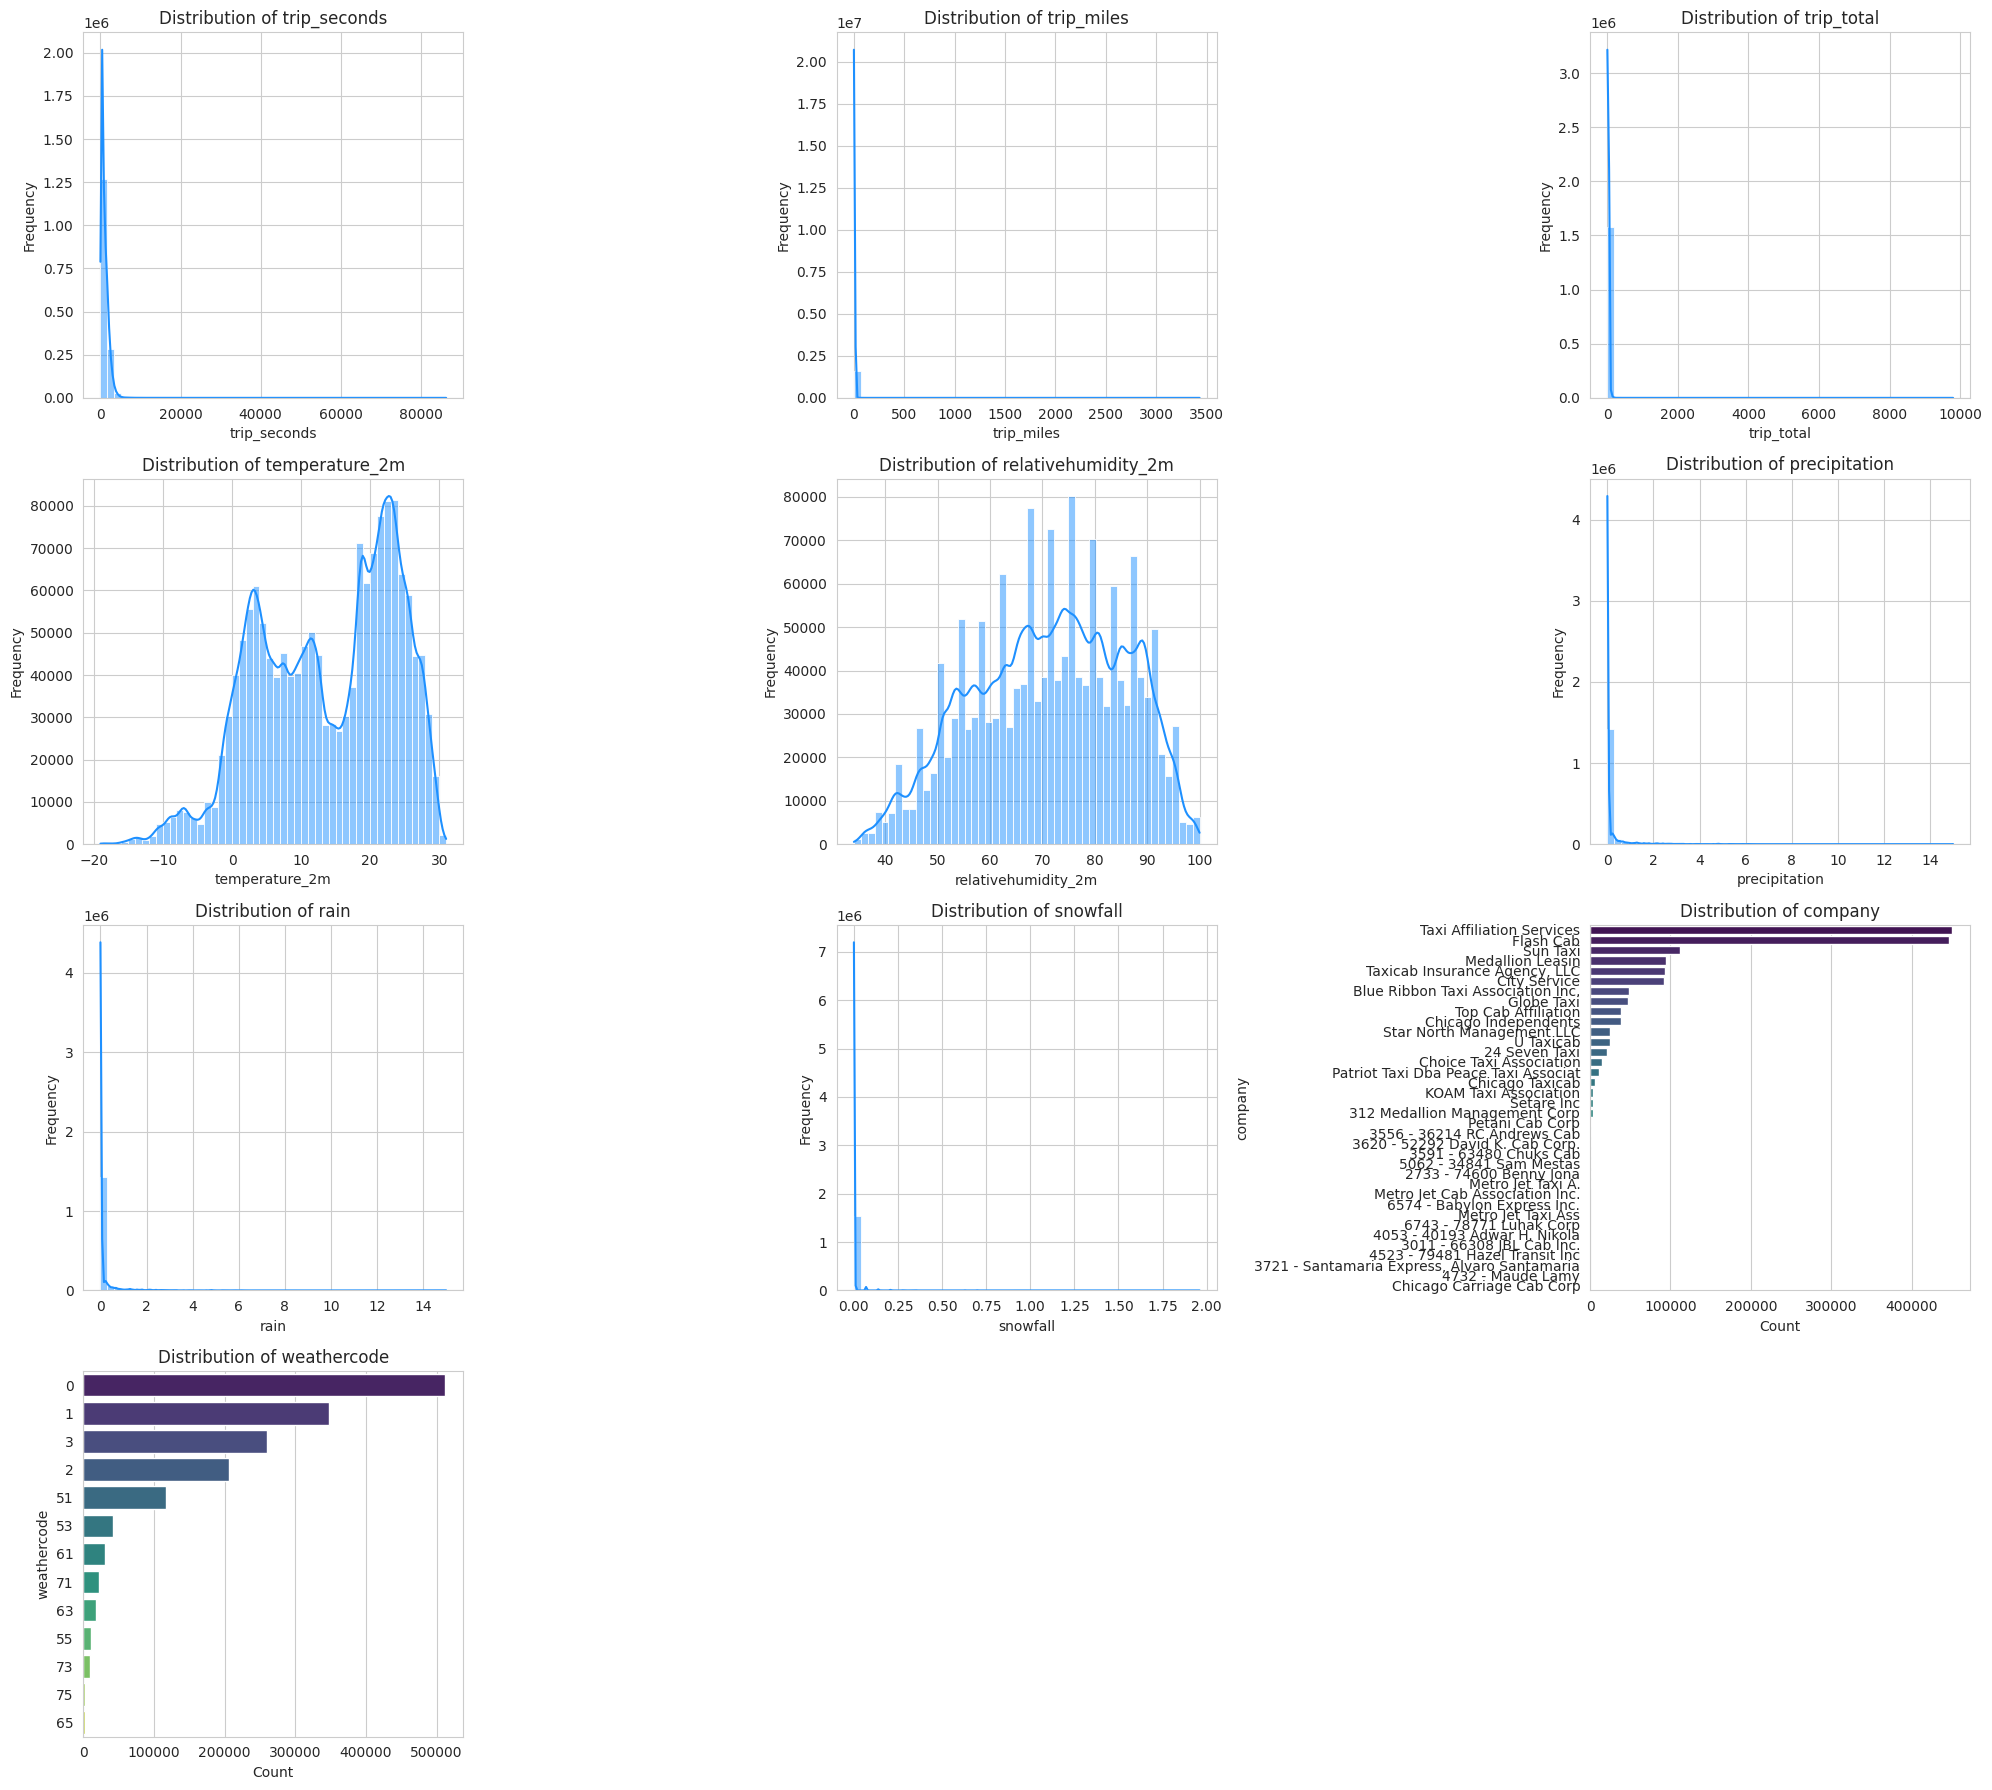

In [ ]:
# Setting the style for seaborn plots
sns.set_style("whitegrid")

# List of columns for univariate analysis
continuous_features = ['trip_seconds', 'trip_miles', 'trip_total', 'temperature_2m', 'relativehumidity_2m', 'precipitation', 'rain', 'snowfall']
categorical_features = ['company', 'weathercode']

# Plotting distributions for the selected columns
plt.figure(figsize=(20, 18))

# Plotting continuous features
for i, col in enumerate(continuous_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data_df[col], bins=50, kde=True, color='dodgerblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Plotting categorical features
for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i+len(continuous_features))
    sns.countplot(y=data_df[col], order=data_df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Univariate Analysis</strong></h4>
<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
Observations from the univariate analysis of continuous and categorical features include:
<ul>
<li><strong>Continuous Features:</strong> Histograms with kernel density estimates show the distribution of data for each continuous feature. Features like <span style='color:darkgreen;'><strong>'trip_seconds'</strong></span>, <span style='color:darkgreen;'><strong>'trip_miles'</strong></span>, and <span style='color:darkgreen;'><strong>'trip_total'</strong></span> have a right-skewed distribution, indicating most trips are of shorter duration, distance, and involve lower fares.</li>
<li><strong>Weather-related Features:</strong> Insights into climate conditions are provided by features like <span style='color:darkgreen;'><strong>'temperature_2m'</strong></span>, <span style='color:darkgreen;'><strong>'relativehumidity_2m'</strong></span>, <span style='color:darkgreen;'><strong>'precipitation'</strong></span>, <span style='color:darkgreen;'><strong>'rain'</strong></span>, and <span style='color:darkgreen;'><strong>'snowfall'</strong></span>.</li>
<li><strong>Categorical Features:</strong> Count plots for <span style='color:darkgreen;'><strong>'company'</strong></span> and <span style='color:darkgreen;'><strong>'weathercode'</strong></span> reveal the frequency distribution across different taxi companies and weather conditions, respectively.</li>
</ul>
These visualizations are crucial for understanding the distribution and identifying patterns in the dataset.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Univariate Analysis of Spatial Features</strong></h4>


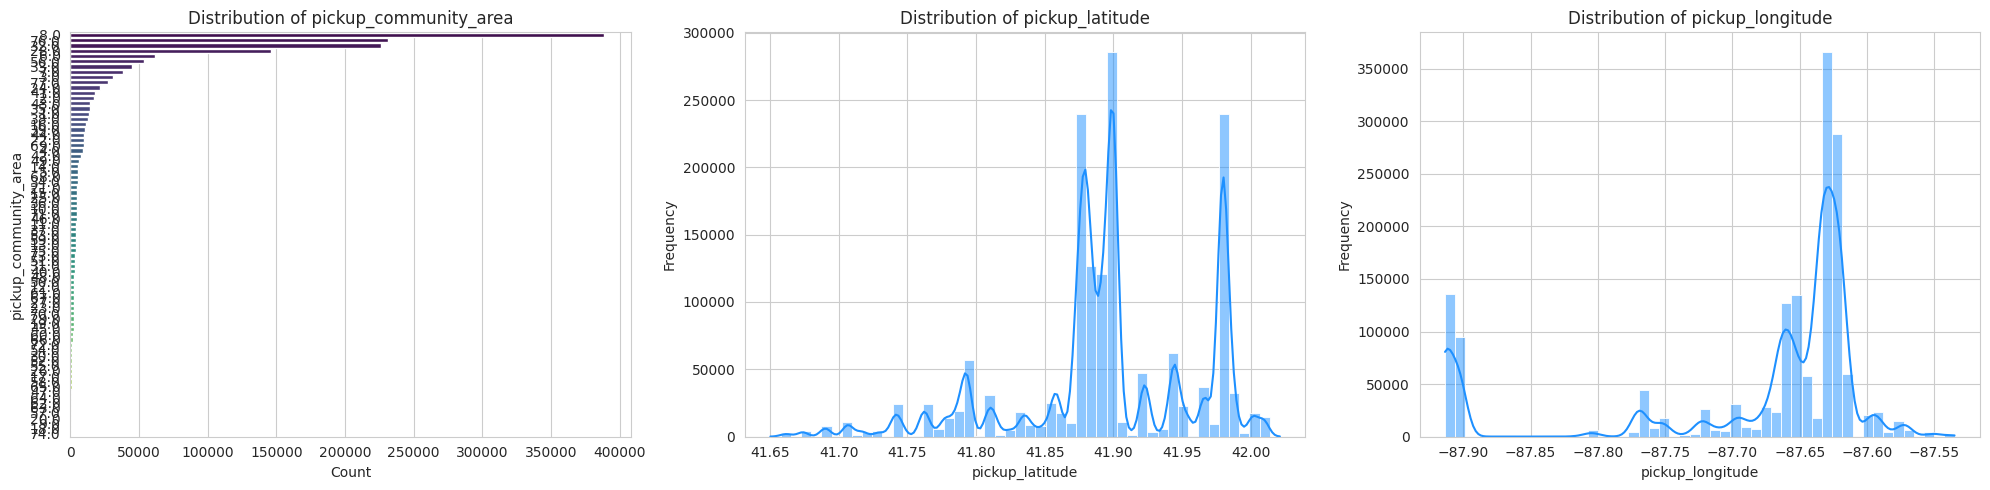

In [ ]:
# List of additional columns for univariate analysis
spatial_features = ['pickup_community_area', 'pickup_latitude', 'pickup_longitude']

# Plotting distributions for the additional columns
plt.figure(figsize=(20, 5))

# Plotting the distributions
for i, col in enumerate(spatial_features, 1):
    plt.subplot(1, 3, i)
    if col == 'pickup_community_area':
        sns.countplot(y=data_df[col], order=data_df[col].value_counts().index, palette='viridis')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.title(f'Distribution of {col}')
    else:
        sns.histplot(data_df[col], bins=50, kde=True, color='dodgerblue')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()


<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
In this code block, we extend our univariate analysis to include spatial features: <span style='color:darkgreen;'><strong>'pickup_community_area'</strong></span>, <span style='color:darkgreen;'><strong>'pickup_latitude'</strong></span>, and <span style='color:darkgreen;'><strong>'pickup_longitude'</strong></span>. Count plots and histograms are used to explore the distribution of these features. For <span style='color:darkgreen;'><strong>'pickup_community_area'</strong></span>, a count plot visualizes the frequency of pickups in different areas, while histograms for <span style='color:darkgreen;'><strong>'pickup_latitude'</strong></span> and <span style='color:darkgreen;'><strong>'pickup_longitude'</strong></span> show the geographical distribution of pickup locations. This analysis helps in identifying popular pickup areas and potential hotspots.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Spatial Feature Analysis</strong></h4>
<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
<ul>
<li><strong><span style='color:darkgreen;'>pickup_community_area:</span></strong> The count plot illustrates the distribution of taxi pickups across different community areas, highlighting regions with higher or lower pickup frequencies.</li>
<li><strong><span style='color:darkgreen;'>pickup_latitude</span></strong> and <strong><span style='color:darkgreen;'>pickup_longitude:</span></strong> Histograms for these features provide insights into the geographical distribution of pickups. The observed patterns indicate the presence of dense regions or hotspots where pickups are more concentrated.</li>
</ul>
These visual analyses are instrumental in understanding spatial dynamics of taxi pickups, aiding in efficient taxi deployment and urban planning strategies.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Visualizing Taxi Pickups on a Map</strong></h4>


In [ ]:
# Create a base map
m = folium.Map(location=[data_df['pickup_latitude'].mean(), data_df['pickup_longitude'].mean()], zoom_start=12)

# Add pickup points to the map
sample_data = data_df.sample(500)  # Taking a sample to avoid overcrowding the map
for _, row in sample_data.iterrows():
    folium.CircleMarker(
        location=[row['pickup_latitude'], row['pickup_longitude']],
        radius=5,
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m.save('pickups_map.html')


<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
This code block is focused on visualizing taxi pickup locations using Folium, a library that allows for easy creation of interactive maps. A base map is created centered around the average latitude and longitude of the pickups. To provide a clear representation without overcrowding the map, a sample of 500 data points is taken from <span style='color:darkgreen;'><strong>'data_df'</strong></span>. Each data point in this sample represents a taxi pickup location, visualized as a circle marker on the map. The resulting map, saved as 'pickups_map.html', offers an interactive way to explore the spatial distribution of taxi pickups, highlighting areas of high activity and potential hotspots within the city.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Timestamp Conversion and Time Feature Extraction</strong></h4>


In [ ]:
# Convert the 'trip_start_timestamp' column to datetime format
data_df['trip_start_timestamp'] = pd.to_datetime(data_df['trip_start_timestamp'])

# 2. Extract features
data_df['year'] = data_df['trip_start_timestamp'].dt.year
data_df['month'] = data_df['trip_start_timestamp'].dt.month
data_df['month_name'] = data_df['trip_start_timestamp'].dt.month_name()
data_df['day'] = data_df['trip_start_timestamp'].dt.day
data_df['hour'] = data_df['trip_start_timestamp'].dt.hour
data_df['weekday'] = data_df['trip_start_timestamp'].dt.weekday
data_df['trip_date'] = data_df['trip_start_timestamp'].dt.date
data_df['day_of_week'] = data_df['trip_start_timestamp'].dt.day_name()

<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
This code block focuses on converting the <span style='color:darkgreen;'><strong>'trip_start_timestamp'</strong></span> column in <span style='color:darkgreen;'><strong>'data_df'</strong></span> to a datetime format using pandas, which facilitates time-based analysis. Following the conversion, various temporal features are extracted:
<ul>
<li><strong>Year, Month, Day, and Hour:</strong> Extracted to analyze trends over these time frames.</li>
<li><strong>Month Name and Day of Week:</strong> Useful for more readable and intuitive analysis.</li>
<li><strong>Weekday:</strong> Numerical representation of the day of the week.</li>
<li><strong>Trip Date:</strong> Extracted as a separate feature for date-based analysis.</li>
</ul>
These extracted features enable a more detailed and nuanced exploration of the dataset, particularly in understanding temporal patterns and trends in taxi trip data.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Analysis of Hourly Taxi Demand</strong></h4>


<AxesSubplot:title={'center':'Hourly Distribution of Taxi Demand'}, xlabel='hour'>

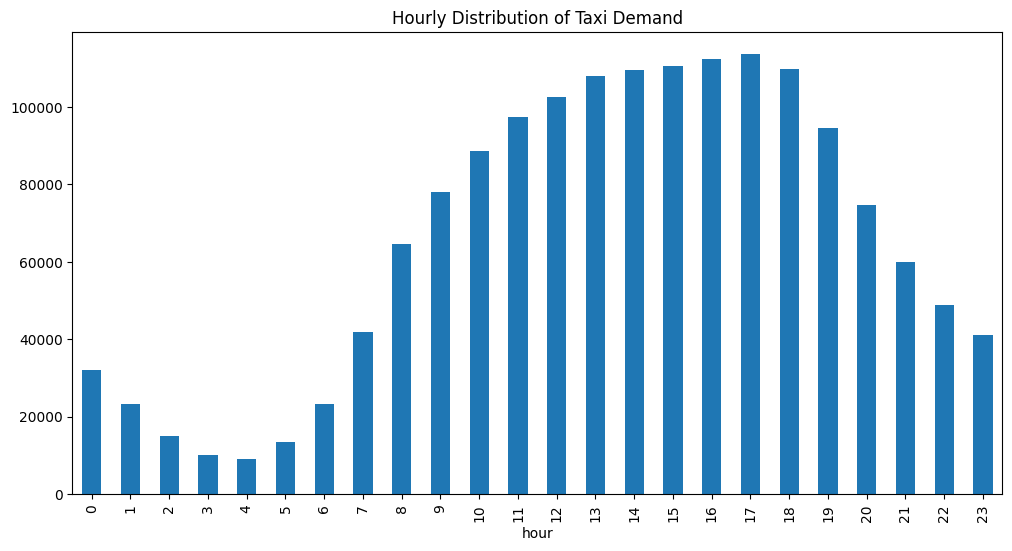

In [ ]:
# Group by the hour and count the number of unique trips
hourly_demand = data_df.groupby('hour')['unique_key'].count()

hourly_demand.plot(kind='bar', figsize=(12, 6), title='Hourly Distribution of Taxi Demand')

<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
This code block performs an analysis of taxi demand based on hourly data. By grouping the <span style='color:darkgreen;'><strong>'data_df'</strong></span> DataFrame by the <span style='color:darkgreen;'><strong>'hour'</strong></span> feature and counting the number of unique trips (using the <span style='color:darkgreen;'><strong>'unique_key'</strong></span> column), we obtain a measure of demand for each hour of the day. The resulting series, <span style='color:darkgreen;'><strong>'hourly_demand'</strong></span>, is then visualized as a bar chart, providing a clear depiction of how taxi demand varies throughout the day.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Hourly Demand Pattern</strong></h4>
<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
<ul>
<li>A noticeable decrease in taxi demand occurs in the early morning hours, reaching its lowest point around 5 AM.</li>
<li>Demand begins to rise from around 6 AM, increasing steadily and peaking during the late afternoon and early evening.</li>
<li>The demand then progressively decreases throughout the night.</li>
</ul>
This pattern aligns with common urban dynamics, where increased demand during peak hours contrasts with reduced demand during off-peak periods, typical in metropolitan areas.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Analysis of Taxi Demand by Day of the Week</strong></h4>


<AxesSubplot:title={'center':'Distribution of Taxi Demand by Day of the Week'}, xlabel='day_of_week'>

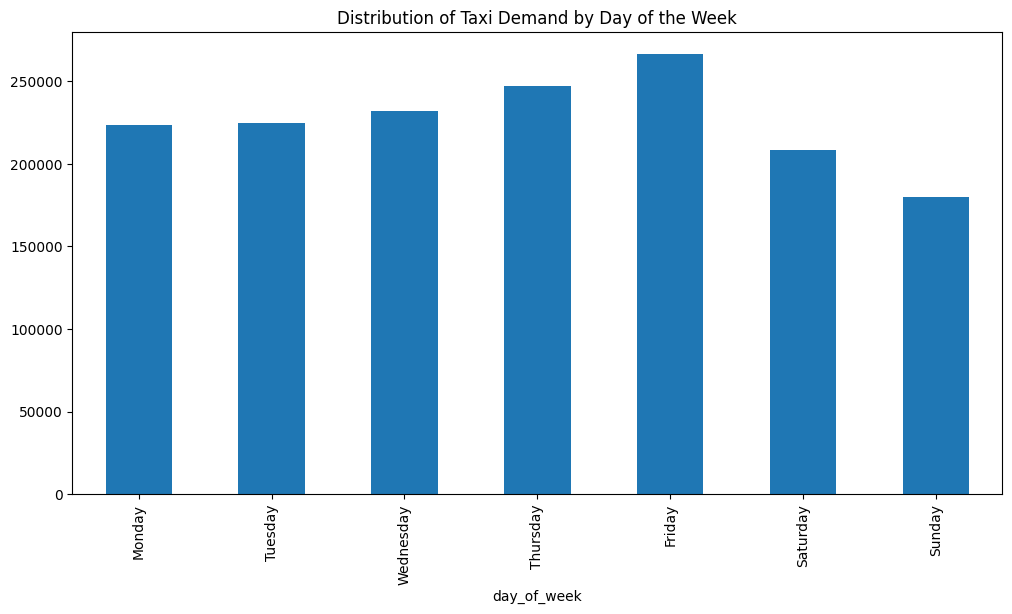

In [ ]:
# Order the days of the week for proper plotting
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by the day of the week and count the number of unique trips
weekly_demand = data_df.groupby('day_of_week')['unique_key'].count().reindex(order)

weekly_demand.plot(kind='bar', figsize=(12, 6), title='Distribution of Taxi Demand by Day of the Week')



<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Weekly Demand Pattern</strong></h4>
<span style='color:black'>
<ul>
<li>Taxi demand is relatively consistent from Monday to Friday, with a notable increase on Fridays, suggesting a peak in demand.</li>
<li>There is a noticeable drop in demand on Saturdays, and Sundays experience the lowest demand levels.</li>
<li>This pattern mirrors typical urban dynamics, where demand on weekdays, particularly Fridays, is driven by work-related commuting and activities. In contrast, the quieter weekends, especially Sundays, reflect a reduction in such activities.</li>
</ul>
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Analysis of Taxi Demand by Month</strong></h4>


<AxesSubplot:title={'center':'Distribution of Taxi Demand by Month'}, xlabel='month_name'>

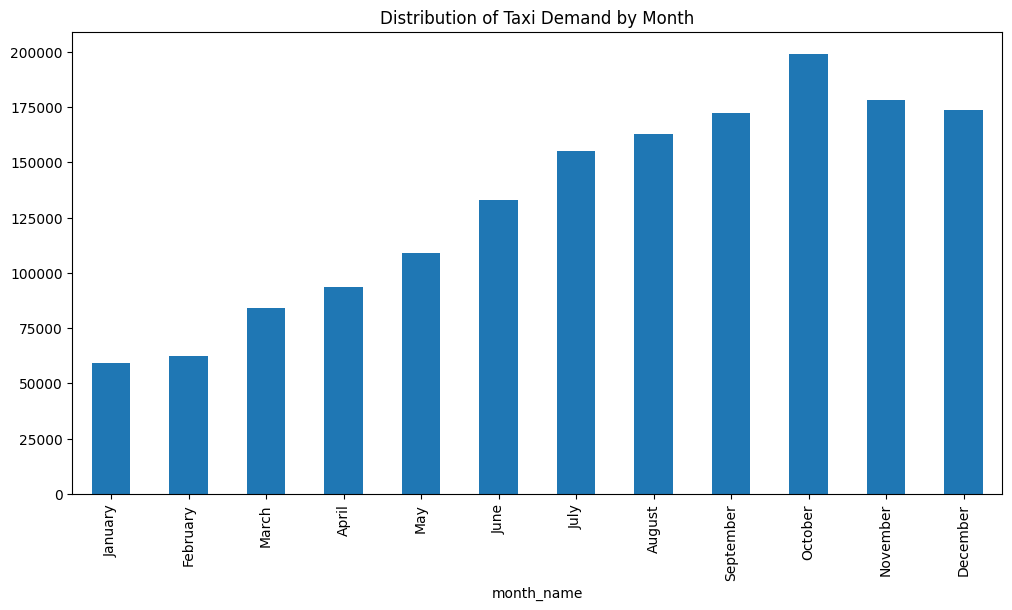

In [ ]:
# Order the months for proper plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by the month and count the number of unique trips
monthly_demand = data_df.groupby('month_name')['unique_key'].count().reindex(month_order)

monthly_demand.plot(kind='bar', figsize=(12, 6), title='Distribution of Taxi Demand by Month')

<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Monthly Demand Pattern</strong></h4>
<span style='color:black'>
<ul>
<li>The demand for taxis is relatively steady from January through May, indicating a consistent pattern during these months.</li>
<li>June experiences a noticeable peak, marking it as the month with the highest taxi demand.</li>
<li>Following this peak, demand declines in July and then stabilizes from August to December.</li>
<li>The surge in demand during June could be related to a variety of factors, including holidays, local events, or seasonal tourist influxes.</li>
</ul>
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Taxi Demand vs. Temperature Analysis</strong></h4>


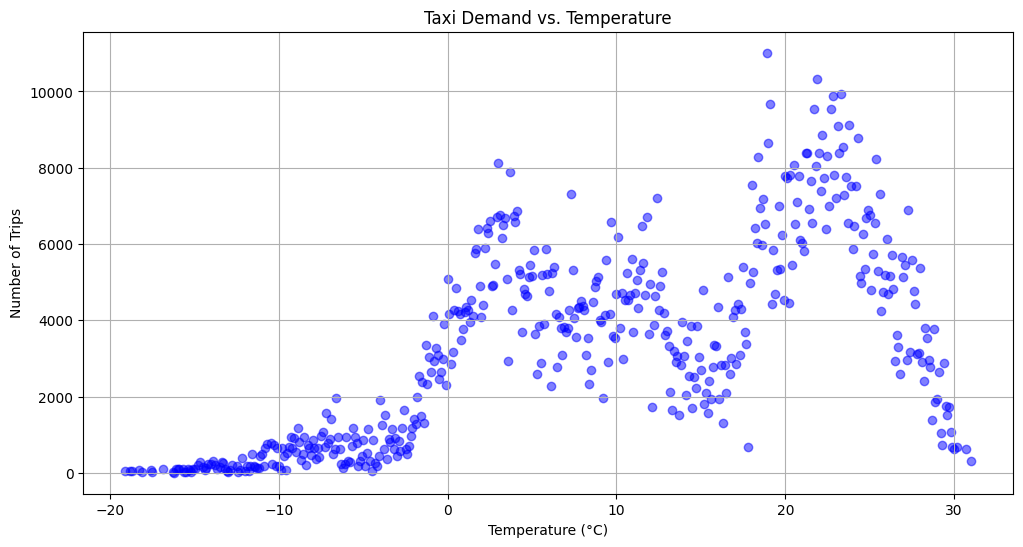

In [ ]:
import matplotlib.pyplot as plt

# Group by temperature and count the number of unique trips
temperature_demand = data_df.groupby('temperature_2m')['unique_key'].count()

plt.figure(figsize=(12, 6))
plt.scatter(temperature_demand.index, temperature_demand.values, color='blue', alpha=0.5)
plt.title('Taxi Demand vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Temperature Impact on Demand</strong></h4>
<span style='color:black'>
<ul>
<li>The scatter plot visualizes the relationship between taxi demand and temperature. Demand appears relatively stable across a broad temperature range.</li>
<li>Notably, there is a slight uptick in demand around moderate temperatures, specifically in the range of 10°C to 20°C. This suggests a preference for using taxis during more comfortable weather conditions.</li>
<li>At extreme temperatures, either very cold or very hot, there isn’t a significant increase in taxi demand. This observation could be crucial for planning and optimizing taxi services around typical weather patterns.</li>
</ul>
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Taxi Demand vs. Precipitation Analysis</strong></h4>


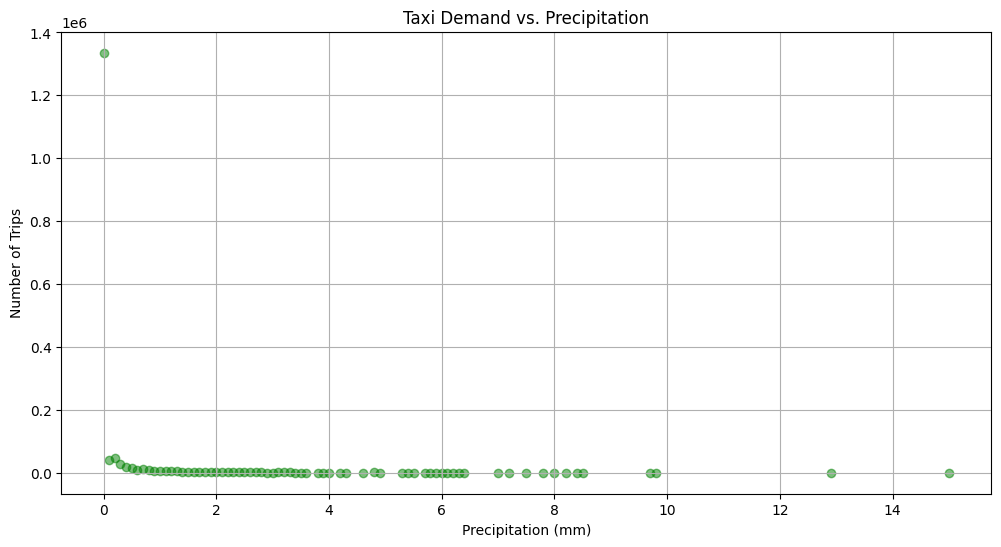

In [ ]:
# Group by precipitation and count the number of unique trips
precipitation_demand = data_df.groupby('precipitation')['unique_key'].count()

plt.figure(figsize=(12, 6))
plt.scatter(precipitation_demand.index, precipitation_demand.values, color='green', alpha=0.5)
plt.title('Taxi Demand vs. Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Precipitation Impact on Demand</strong></h4>
<span style='color:black'>
<ul>
<li>The scatter plot presents the correlation between taxi demand and precipitation levels. A clear majority of taxi trips are observed during conditions of low or no precipitation.</li>
<li>As precipitation levels rise, there is an apparent decrease in the number of taxi trips. This trend could indicate that heavy rain or snowfall deters people from using taxis, or it could reflect a reduced availability of taxis during such weather conditions.</li>
</ul>
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Taxi Demand vs. Weather Code Analysis</strong></h4>


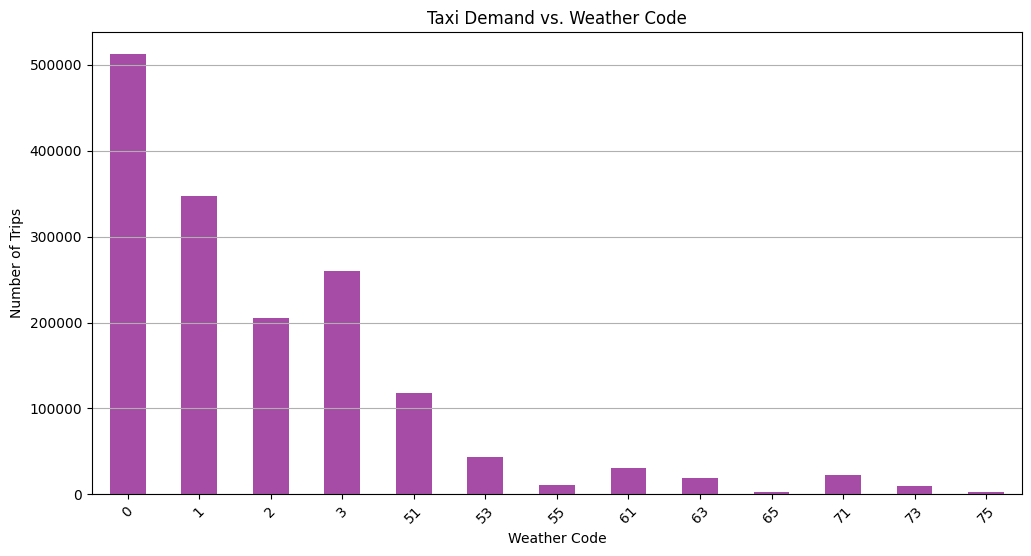

In [ ]:
# Group by weathercode and count the number of unique trips
weathercode_demand = data_df.groupby('weathercode')['unique_key'].count()

plt.figure(figsize=(12, 6))
weathercode_demand.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Taxi Demand vs. Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Weather Code Impact on Demand</strong></h4>
<span style='color:black'>
<ul>
<li>The bar chart illustrates how taxi demand varies with different weather conditions, as represented by weather codes. Higher demand is noticeable for weather codes with lower values.</li>
<li>There is an observed trend where taxi demand decreases as the value of the weather code increases. This pattern suggests that more severe or less favorable weather conditions (typically represented by higher weather code values) are associated with reduced taxi demand.</li>
</ul>
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Taxi Demand by Weather Condition Analysis</strong></h4>


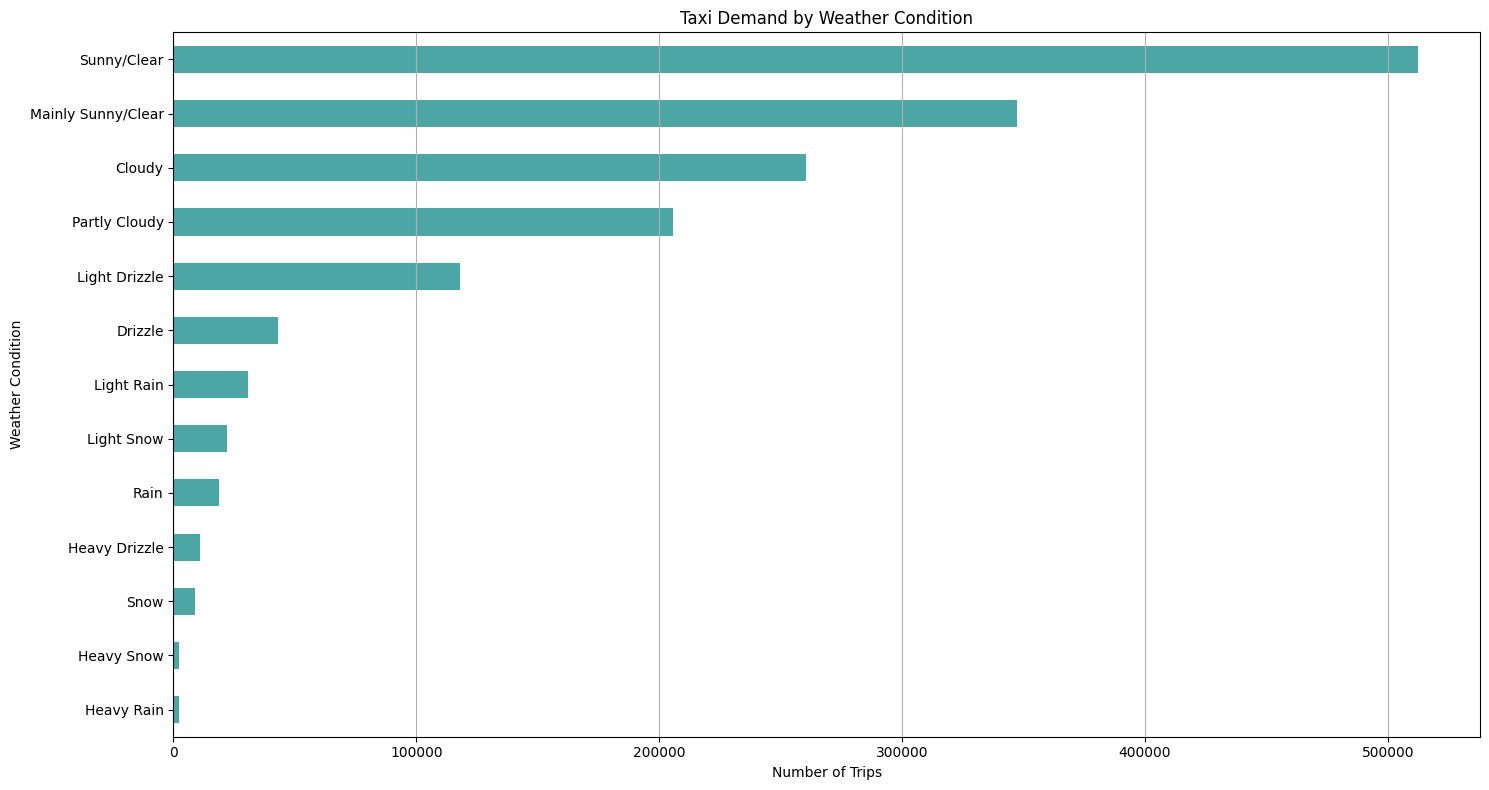

In [ ]:
data_map=data_df
# Mapping of weather codes to their descriptions
weather_code_map = {
    0: "Sunny/Clear",
    1: "Mainly Sunny/Clear",
    2: "Partly Cloudy",
    3: "Cloudy",
    45: "Foggy",
    48: "Rime Fog",
    51: "Light Drizzle",
    53: "Drizzle",
    55: "Heavy Drizzle",
    56: "Light Freezing Drizzle",
    57: "Freezing Drizzle",
    61: "Light Rain",
    63: "Rain",
    65: "Heavy Rain",
    66: "Light Freezing Rain",
    67: "Freezing Rain",
    71: "Light Snow",
    73: "Snow",
    75: "Heavy Snow",
    77: "Snow Grains",
    80: "Light Showers",
    81: "Showers",
    82: "Heavy Showers",
    85: "Light Snow Showers",
    86: "Snow Showers",
    95: "Thunderstorm",
    96: "Light Thunderstorms With Hail",
    99: "Thunderstorm With Hail"
}

# Map the weather codes in the dataframe to the descriptions
data_map['weather_description'] = data_df['weathercode'].map(weather_code_map)

# Group by the weather descriptions and count the number of unique trips
weather_description_demand = data_map.groupby('weather_description')['unique_key'].count()

plt.figure(figsize=(15, 8))
weather_description_demand.sort_values().plot(kind='barh', color='teal', alpha=0.7)
plt.title('Taxi Demand by Weather Condition')
plt.xlabel('Number of Trips')
plt.ylabel('Weather Condition')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Weather Condition Impact on Demand</strong></h4>
<span style='color:black'>
<ul>
<li>Weather conditions described as <span style='color:darkgreen;'>Sunny/Clear</span> and <span style='color:darkgreen;'>Mainly Sunny/Clear</span> are associated with the highest levels of taxi demand. This observation corroborates the trend that taxi demand is elevated during pleasant weather conditions.</li>
<li>Even during <span style='color:darkgreen;'>Partly Cloudy</span> and <span style='color:darkgreen;'>Cloudy</span> conditions, there is still a significant amount of taxi demand, though not as pronounced as during sunny days.</li>
<li>Less favorable conditions, like <span style='color:darkgreen;'>Rain</span>, <span style='color:darkgreen;'>Drizzle</span>, or <span style='color:darkgreen;'>Foggy</span> conditions, lead to a decrease in demand. However, it remains considerable, indicating a continued reliance on taxis during these conditions.</li>
<li>Extreme weather scenarios, such as <span style='color:darkgreen;'>Thunderstorms</span> or <span style='color:darkgreen;'>Snow</span>, result in the lowest demand. This could be attributed to the increased risks and challenges associated with traveling in such severe weather.</li>
</ul>
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Spatial Analysis of Taxi Pickups by Community Area</strong></h4>


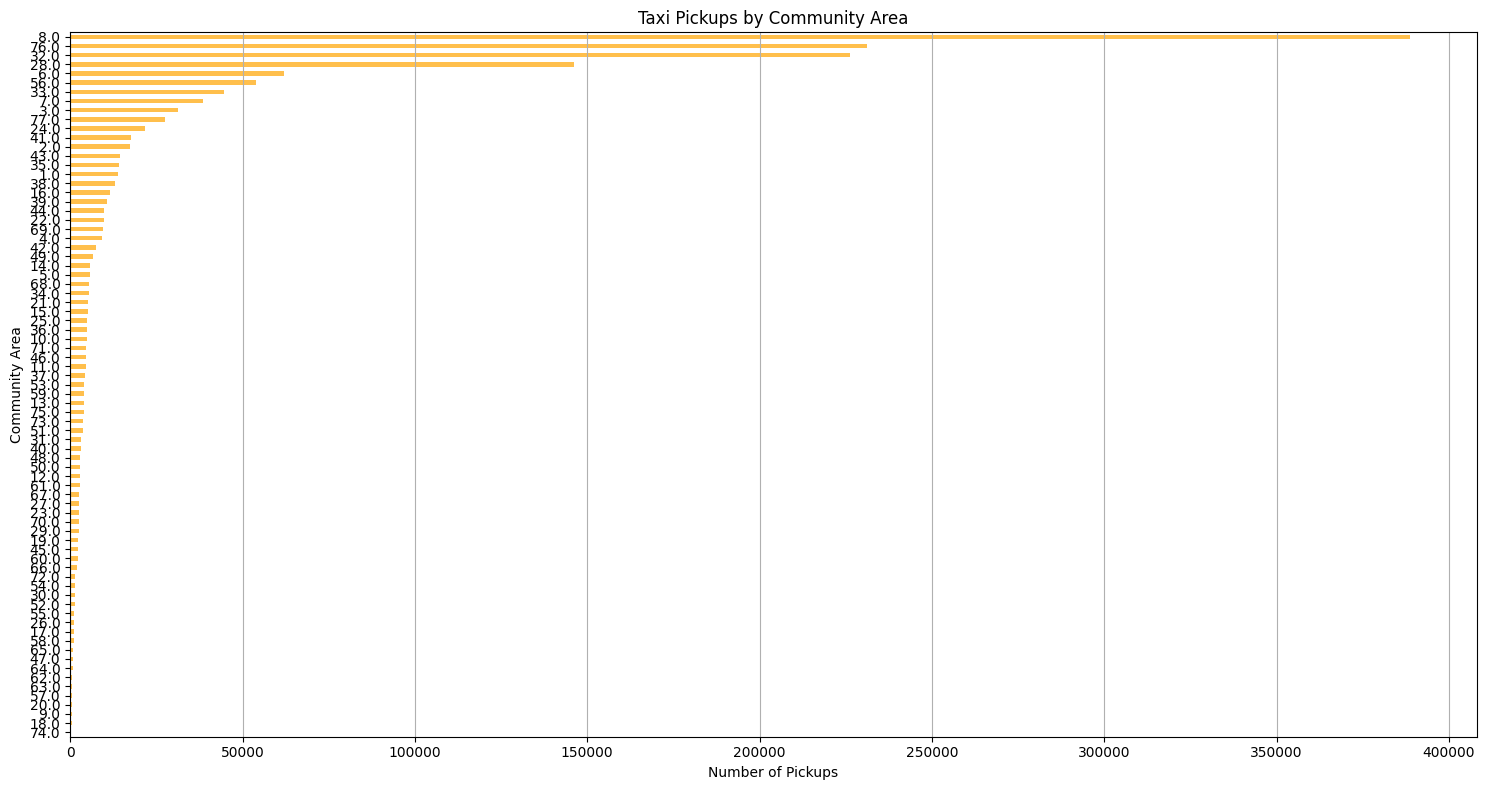

In [ ]:
# Group by pickup community area and count the number of unique trips
pickup_distribution = data_df.groupby('pickup_community_area')['unique_key'].count()

plt.figure(figsize=(15, 8))
pickup_distribution.sort_values().plot(kind='barh', color='orange', alpha=0.7)
plt.title('Taxi Pickups by Community Area')
plt.xlabel('Number of Pickups')
plt.ylabel('Community Area')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Taxi Pickups Distribution</strong></h4>
<span style='color:black'>
The bar chart demonstrates the distribution of taxi pickups across different community areas, revealing significant variations:
<ul>
<li>Some community areas exhibit a notably higher number of taxi pickups. This variation could be influenced by factors such as proximity to popular destinations, business districts, or transport hubs.</li>
<li>Other areas, in contrast, show fewer pickups, which might be related to their geographic location, lower population density, or lack of major attractions.</li>
<li>The disparity in average fares across community areas suggests possible differences in trip lengths or destinations' popularity. Areas with higher average fares might encompass longer trip distances or routes to high-demand locations.</li>
</ul>
This analysis is crucial for identifying key areas with high demand and understanding the spatial dynamics of taxi services in the city.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Analysis of Average Fare by Pickup Community Area</strong></h4>



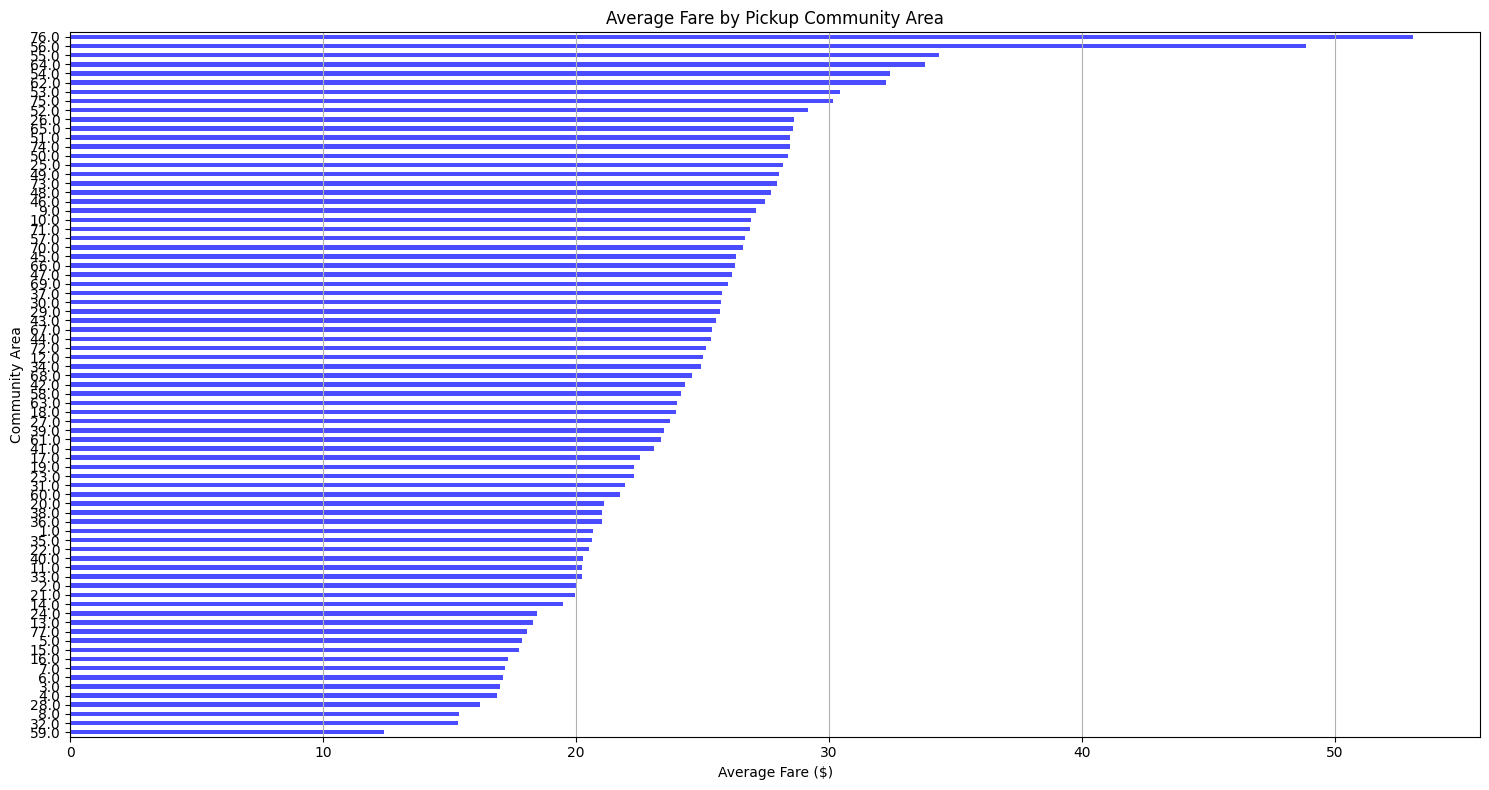

In [ ]:
# Group by pickup community area and calculate the average fare
average_fare = data_df.groupby('pickup_community_area')['trip_total'].mean()

plt.figure(figsize=(15, 8))
average_fare.sort_values().plot(kind='barh', color='blue', alpha=0.7)
plt.title('Average Fare by Pickup Community Area')
plt.xlabel('Average Fare ($)')
plt.ylabel('Community Area')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Average Fare Distribution</strong></h4>
<span style='color:black'>
The horizontal bar chart visualizes the average taxi fare across different community areas, illustrating noticeable variations:
<ul>
<li>There is a significant range in the average fares among the community areas, indicating that certain areas tend to have higher fares on average. This might be due to factors like longer trip distances, higher demand, or proximity to popular or affluent destinations.</li>
<li>Areas with higher average fares could be those frequently involving airport trips, tourist attractions, or business districts, which generally entail longer and more expensive rides.</li>
<li>Conversely, community areas with lower average fares might be closer to frequent destinations or within areas where shorter trips are common.</li>
</ul>
Understanding these fare dynamics is crucial for taxi operators and city planners, as it can guide efficient service allocation and fare structuring.
</span>


In [ ]:
# First, we'll aggregate the data to compute demand for each unique combination of features
demand_df = data_df.groupby(['trip_start_timestamp', 'pickup_community_area']).size().reset_index(name='demand')

In [ ]:
# Merging the aggregated demand with original dataframe to get other features
merged_df = pd.merge(data_df, demand_df, on=['trip_start_timestamp', 'pickup_community_area'], how='left')

<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Data Aggregation</strong></h4>
<span style='color:black'>
The code block performs an aggregation operation on the <span style='color:darkgreen;'><strong>'data_df'</strong></span> DataFrame to compute taxi demand. The grouping is based on each unique combination of <span style='color:darkgreen;'><strong>'trip_start_timestamp'</strong></span> and <span style='color:darkgreen;'><strong>'pickup_community_area'</strong></span>. The result, <span style='color:darkgreen;'><strong>'demand_df'</strong></span>, is a new DataFrame that provides a more granular view of taxi demand, indicating the frequency (or demand) of trips for specific times and locations. This approach allows for a detailed analysis of demand patterns and can be instrumental in identifying high-demand periods and areas, thus informing more effective fleet management and service allocation strategies.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Bivariate Analysis: Taxi Demand vs. Numerical Features</strong></h4>


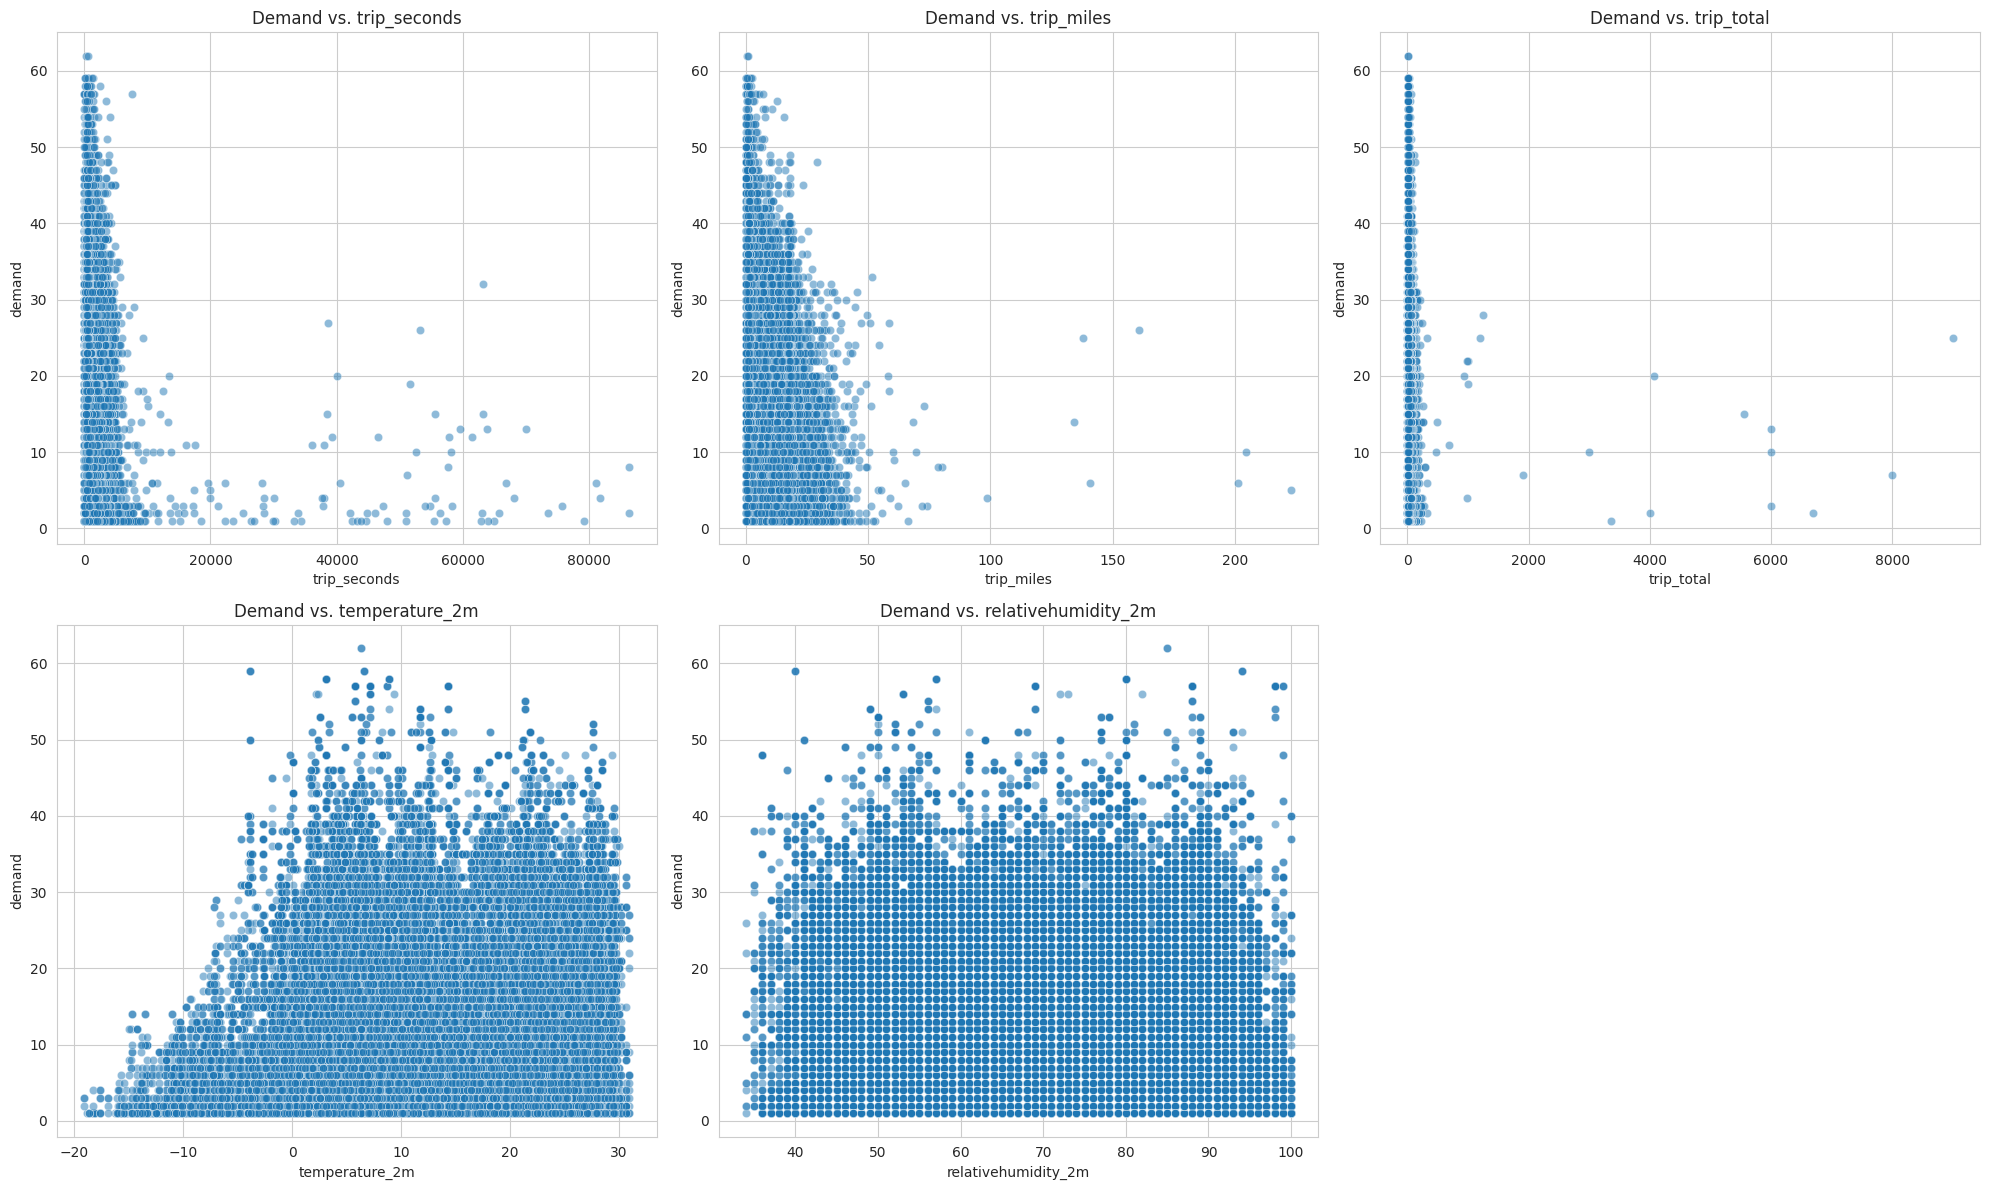

In [ ]:
# We'll use a sample for visualization to make the plots clearer and avoid overplotting
sample_df = merged_df.sample(frac=0.05, random_state=42)

# Bivariate Analysis: Numerical vs. Numerical
plt.figure(figsize=(20, 12))

# List of numerical features to plot against demand
numerical_features = ['trip_seconds', 'trip_miles', 'trip_total', 'temperature_2m', 'relativehumidity_2m']

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=sample_df, x=col, y='demand', alpha=0.5)
    plt.title(f'Demand vs. {col}')

plt.tight_layout()
plt.show()

<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Bivariate Demand Analysis</strong></h4>
<span style='color:black'>
The scatter plots provide insights into the relationship between taxi demand and various numerical features:
<ul>
<li><strong>Demand vs. trip_seconds:</strong> There appears to be no clear trend. While most trips are of shorter duration, the demand is distributed somewhat randomly across different trip lengths.</li>
<li><strong>Demand vs. trip_miles:</strong> Although the majority of trips are short in distance, the demand doesn't show a strong correlation with trip miles and is relatively evenly distributed across distances.</li>
<li><strong>Demand vs. trip_total:</strong> The relationship between the total fare and demand isn’t distinctly apparent, suggesting that the fare amount may not be the sole determinant of demand.</li>
<li><strong>Demand vs. temperature_2m:</strong> The demand appears to be spread across a range of temperatures, lacking a definitive pattern that correlates with temperature.</li>
<li><strong>Demand vs. relativehumidity_2m:</strong> Like temperature, humidity doesn't show a pronounced pattern in relation to taxi demand.</li>
</ul>
These visualizations indicate that factors influencing taxi demand might be more complex than individual numerical features.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Bivariate Analysis: Taxi Demand vs. Categorical Features</strong></h4>


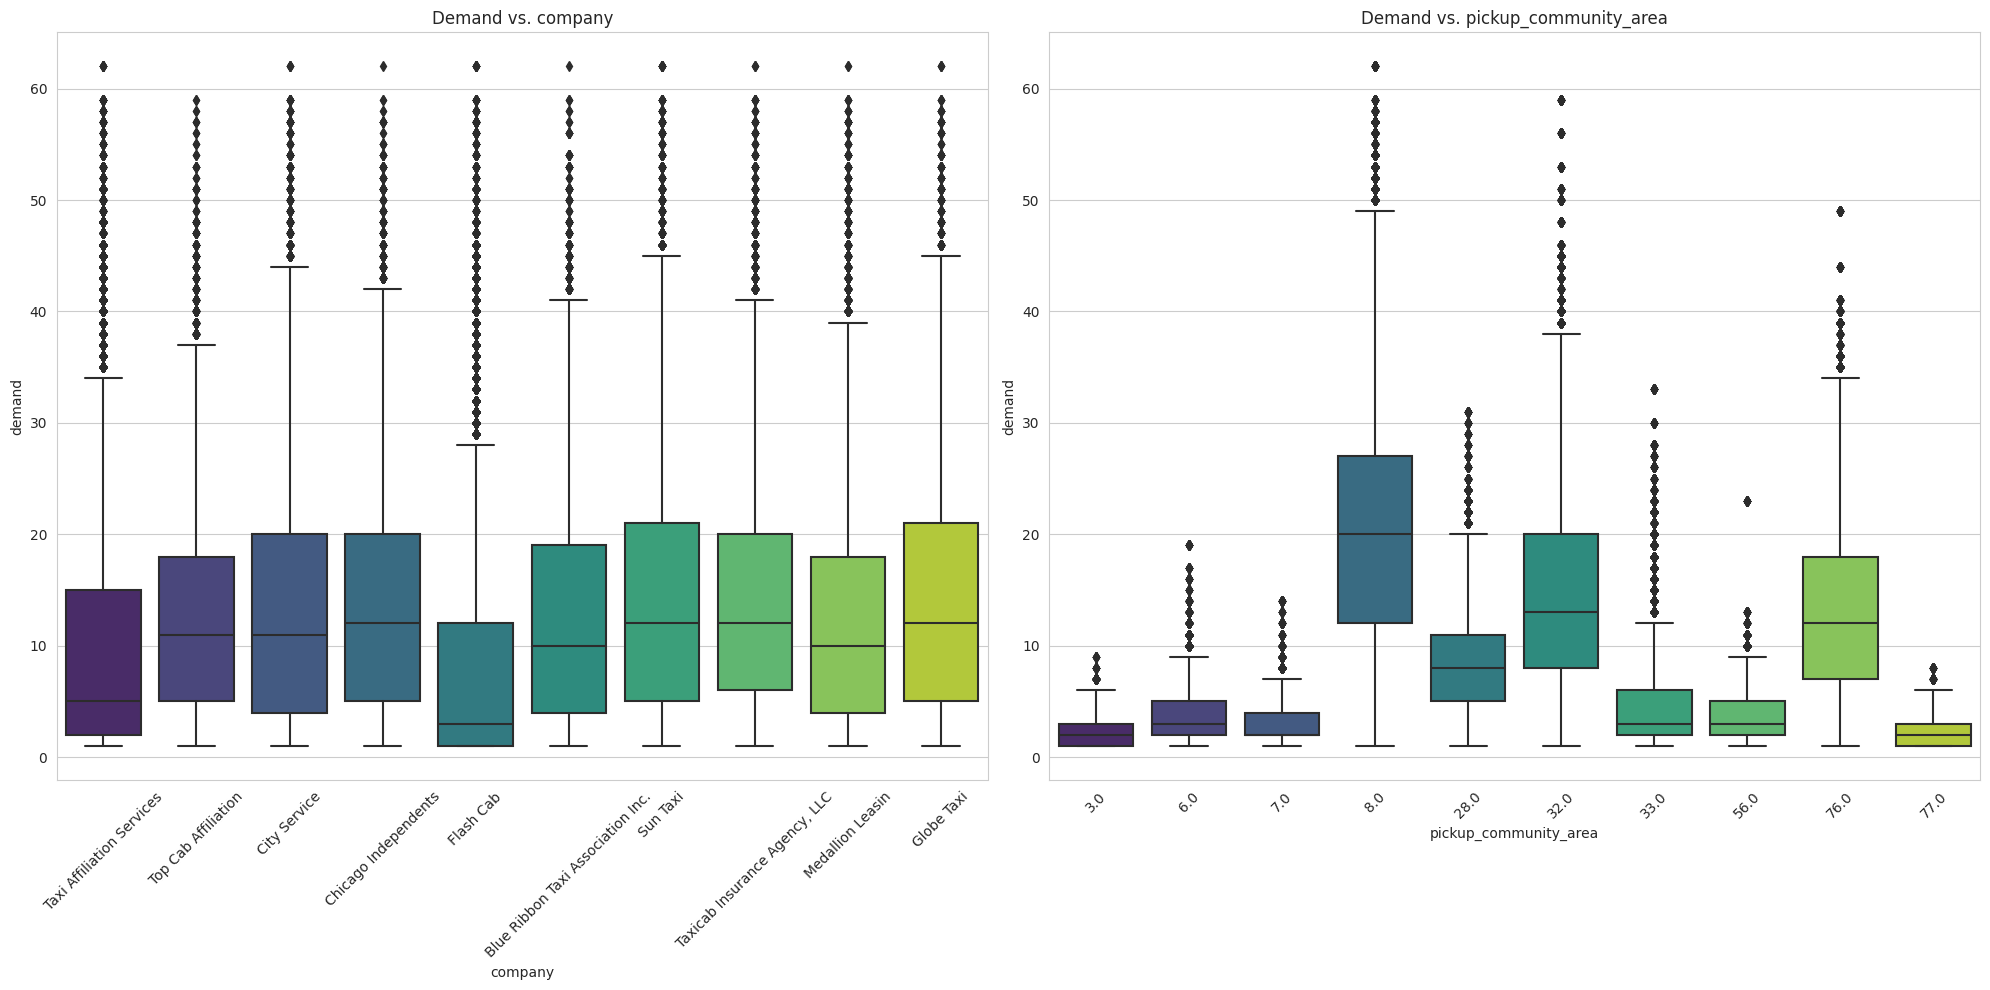

In [ ]:
# Bivariate Analysis: Categorical vs. Numerical

# List of categorical features to plot against demand
categorical_features = ['company', 'pickup_community_area']

plt.figure(figsize=(20, 10))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    
    # Taking the top 10 categories based on demand for better visualization
    top_categories = merged_df.groupby(col)['demand'].sum().nlargest(10).index
    
    sns.boxplot(data=merged_df[merged_df[col].isin(top_categories)], x=col, y='demand', palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Demand vs. {col}')

plt.tight_layout()
plt.show()


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Categorical Feature Analysis</strong></h4>
<span style='color:black'>
The box plots provide insights into the relationship between taxi demand and key categorical features:
<ul>
<li><strong>Demand vs. company:</strong> The distribution of demand among the top 10 taxi companies varies. Some companies exhibit a wider range of demand, while others demonstrate more consistent levels of demand. There are also noticeable differences in the median demand between companies.</li>
<li><strong>Demand vs. pickup_community_area:</strong> The plot for the top 10 pickup community areas shows significant variation in demand. Certain areas have a higher median demand, and the extent of demand variation, as shown by the interquartile range, differs among these areas. This suggests that specific community areas are more popular or have higher taxi service requirements.</li>
</ul>
These analyses help in identifying which companies or community areas see higher or more variable demand, crucial for targeted service planning and marketing strategies.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Outlier Analysis of Numerical Features</strong></h4>


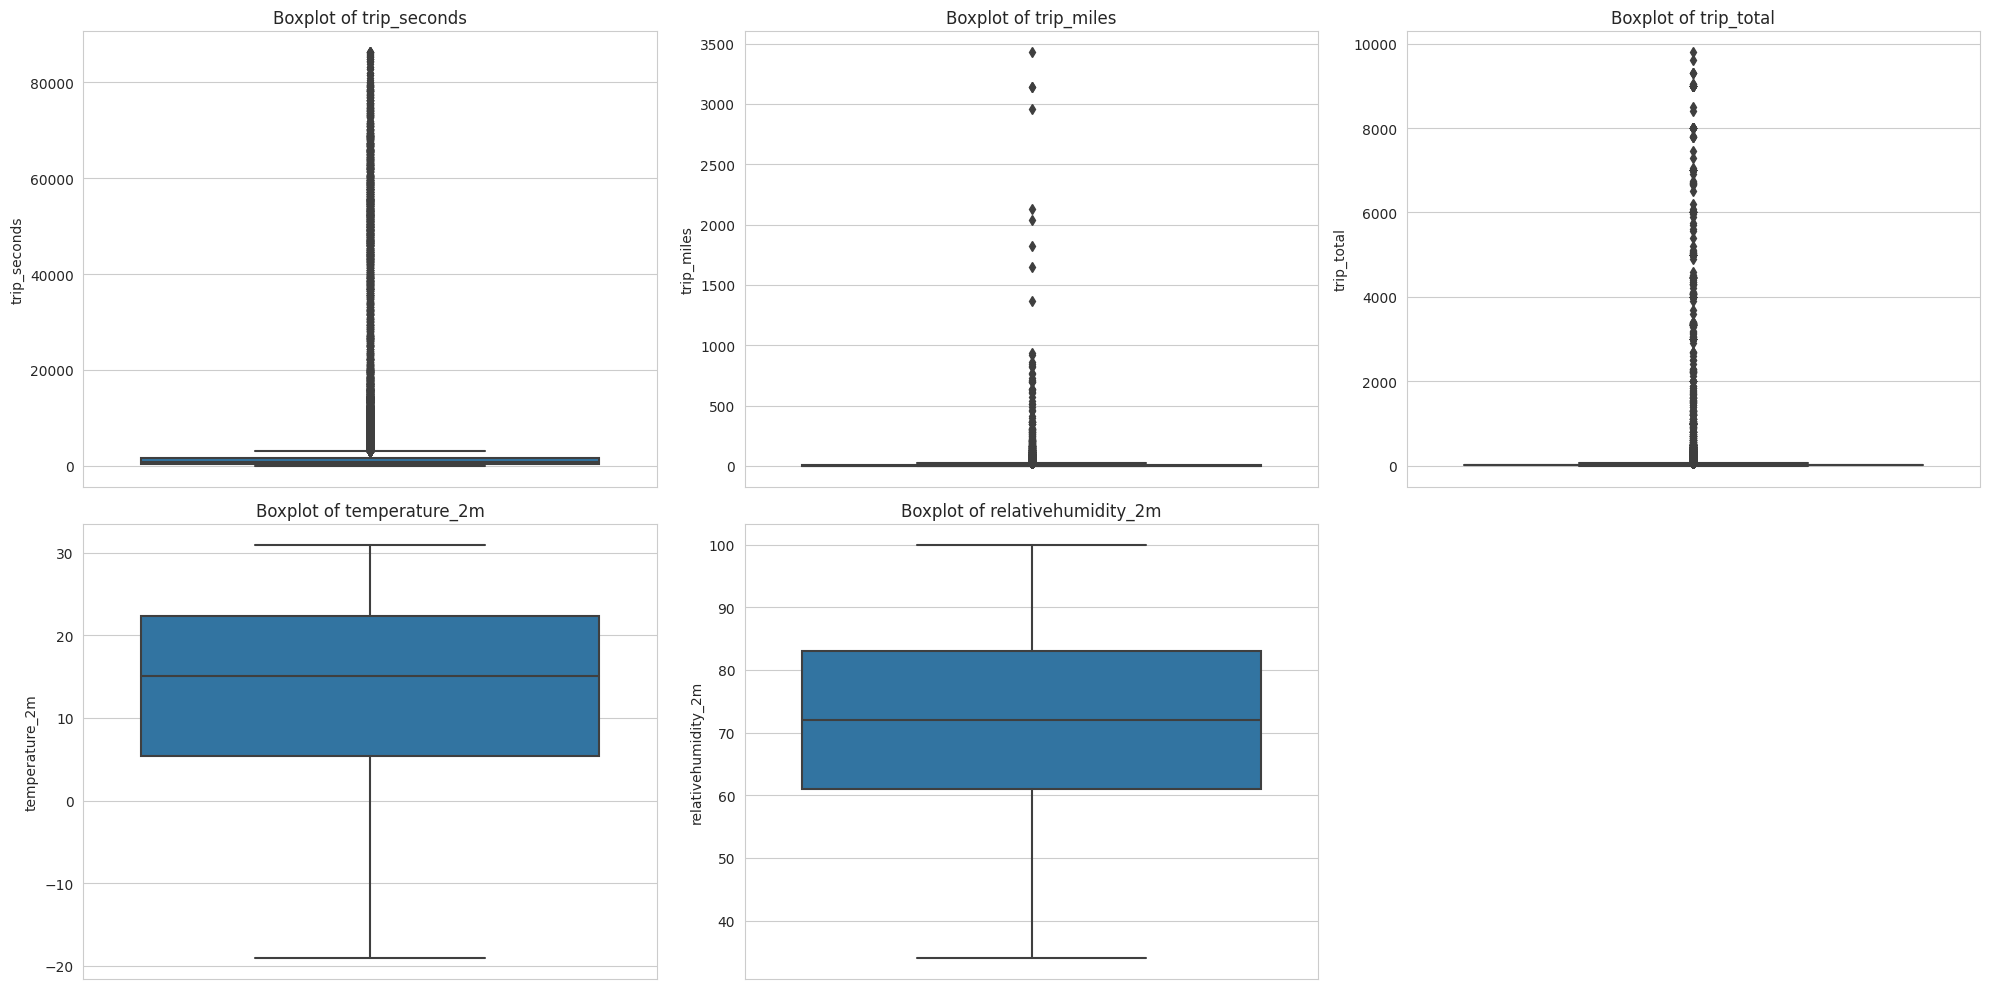

In [ ]:
# Using a different approach to plot the boxplots

plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Outlier Analysis</strong></h4>
<span style='color:black'>
The box plots provide a visual assessment of outliers in various numerical features:
<ul>
<li><strong>trip_seconds and trip_total:</strong> These features exhibit a significant number of outliers. This indicates the presence of trips with unusually long durations and exceptionally high fares, which might be outliers or special cases such as long-distance journeys.</li>
<li><strong>trip_miles:</strong> While there are some outliers in this feature, they are not as prominent as those observed in trip durations and fares.</li>
<li><strong>temperature_2m:</strong> This feature shows a relatively normal distribution, with only a few outliers present at the lower end of the temperature scale.</li>
<li><strong>relativehumidity_2m:</strong> Most of the data for this feature are clustered within the 60-90% range, indicating a good spread with no significant outliers.</li>
</ul>
Identifying these outliers is crucial for understanding data anomalies and can inform more robust and realistic analyses.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Correlation Analysis of Numerical Features</strong></h4>


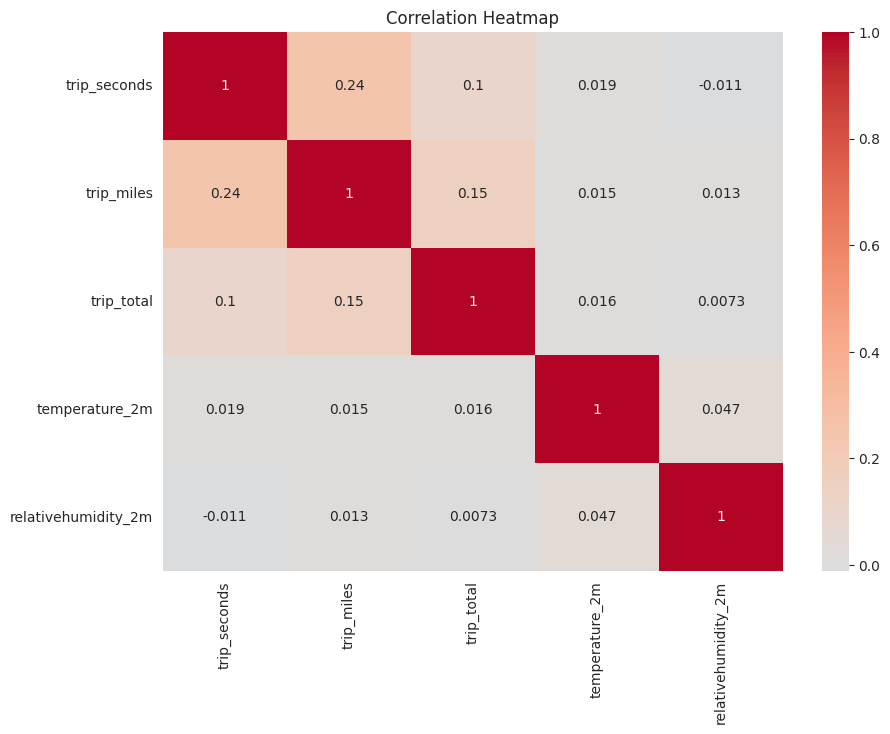

In [ ]:
# Correlation analysis
correlation_matrix = data_df[numerical_features].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Correlation Heatmap</strong></h4>
<span style='color:black'>
The correlation heatmap provides insights into the relationships between various numerical features:
<ul>
<li><strong>trip_miles and trip_seconds:</strong> There is a positive correlation between these two features. This relationship is logical as longer trips in terms of miles would generally take more time.</li>
<li><strong>trip_total:</strong> This feature shows a positive correlation with both <span style='color:darkgreen;'><strong>trip_miles</strong></span> and <span style='color:darkgreen;'><strong>trip_seconds</strong></span>. This indicates that trips that are longer both in terms of distance and duration tend to incur higher fares.</li>
<li><strong>Weather-related Variables:</strong> Features like <span style='color:darkgreen;'><strong>temperature_2m</strong></span>, <span style='color:darkgreen;'><strong>relativehumidity_2m</strong></span>, and <span style='color:darkgreen;'><strong>precipitation</strong></span> exhibit very weak correlations with trip attributes, suggesting a lack of strong linear relationships between these weather conditions and trip characteristics.</li>
</ul>
This correlation analysis is instrumental in understanding the interdependencies between different aspects of taxi trips and can help in formulating more nuanced strategies for managing taxi services.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Percentile Analysis of Continuous Variables</strong></h4>


In [ ]:
# List of continuous variables to inspect
continuous_vars = ['trip_seconds', 'trip_miles', 'trip_total']

# Function to print percentiles for the given variable
def print_percentiles(var_name, data):
    print(f"Percentiles for {var_name}:")
    
    # 0-100th percentiles in steps of 10
    for i in range(0, 101, 10):
        percentile_value = np.percentile(data[var_name], q=i)
        print(f"{i}th percentile: {percentile_value:.2f}")
    
    # 90-100th percentiles
    print("------")
    for i in range(90, 101):
        percentile_value = np.percentile(data[var_name], q=i)
        print(f"{i}th percentile: {percentile_value:.2f}")
    
    print("\n")

# Printing percentiles for each continuous variable
for var in continuous_vars:
    print_percentiles(var, data_df)


Percentiles for trip_seconds:
0th percentile: 0.00
10th percentile: 213.00
20th percentile: 360.00
30th percentile: 480.00
40th percentile: 632.00
50th percentile: 810.00
60th percentile: 1069.00
70th percentile: 1380.00
80th percentile: 1724.00
90th percentile: 2278.00
100th percentile: 86340.00
------
90th percentile: 2278.00
91th percentile: 2340.00
92th percentile: 2435.00
93th percentile: 2520.00
94th percentile: 2640.00
95th percentile: 2783.00
96th percentile: 2940.00
97th percentile: 3180.00
98th percentile: 3480.00
99th percentile: 4024.00
100th percentile: 86340.00


Percentiles for trip_miles:
0th percentile: 0.00
10th percentile: 0.00
20th percentile: 0.40
30th percentile: 0.90
40th percentile: 1.40
50th percentile: 2.19
60th percentile: 3.80
70th percentile: 7.20
80th percentile: 10.97
90th percentile: 15.72
100th percentile: 3430.53
------
90th percentile: 15.72
91th percentile: 16.50
92th percentile: 17.00
93th percentile: 17.40
94th percentile: 17.65
95th percentile: 17

<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Percentile Distribution</strong></h4>
<span style='color:black'>
The percentile distribution of various continuous variables provides insights into the range and spread of these features:
<ul>
<li><strong>Trip Seconds (trip_seconds):</strong> The median (50th percentile) duration is 810 seconds (approximately 13.5 minutes). Notably, 90% of the trips are shorter than 2278 seconds (around 38 minutes). The maximum trip duration is a substantial 86340 seconds, indicating potential outliers or unusual long-duration trips.</li>
<li><strong>Trip Miles (trip_miles):</strong> The median trip distance is 2.19 miles. Trips are generally short, with 90% being under 15.72 miles. The longest trip recorded is 3430.53 miles, which is exceptionally high and could represent an outlier or data entry error.</li>
<li><strong>Trip Total (trip_total):</strong> The median fare amount is $15.50, and 90% of the fares are less than $52.25. The highest fare recorded is $9800.30, which seems unusually high and might be due to outliers or unique cases like extremely long trips or additional charges.</li>
</ul>
This analysis is crucial in identifying typical trip characteristics and detecting anomalies or outliers within the dataset.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Scatter Plot Analysis of Taxi Pickup Locations</strong></h4>


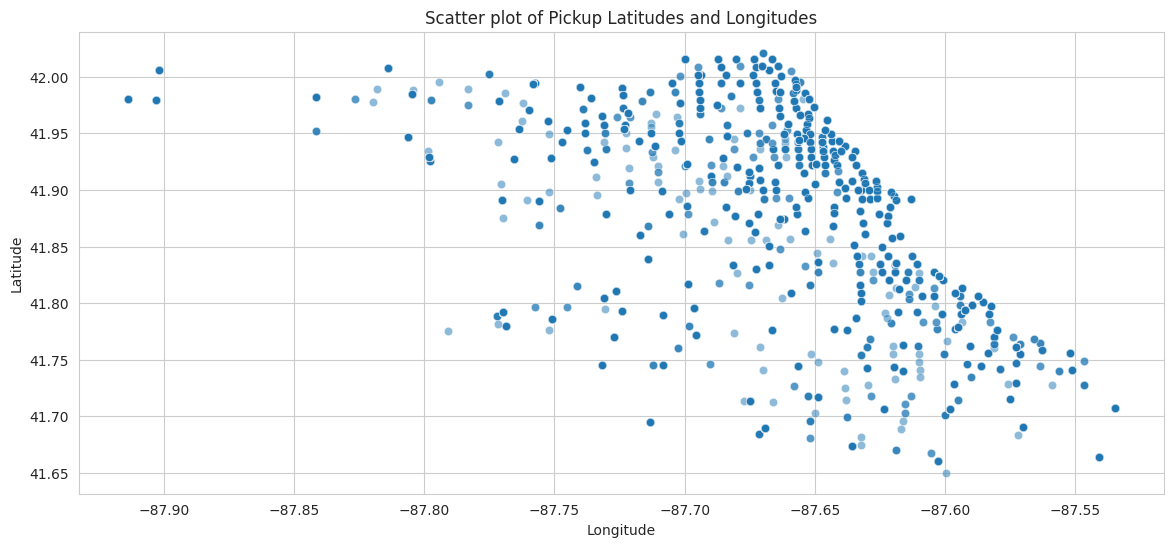

In [ ]:
# Scatter plot for pickup_latitude and pickup_longitude
plt.figure(figsize=(14, 6))
sns.scatterplot(x=data_df['pickup_longitude'], y=data_df['pickup_latitude'], alpha=0.5)
plt.title('Scatter plot of Pickup Latitudes and Longitudes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Pickup Location Scatter Plot</strong></h4>
<span style='color:black'>
The scatter plot visualizes the geographical distribution of taxi pickups in terms of latitude and longitude:
<ul>
<li>The plot offers a spatial representation of where taxi pickups are concentrated within the city. Dense clusters in the scatter plot can indicate popular areas or hotspots for taxi pickups.</li>
<li>Areas with fewer points suggest less frequent taxi activity, which might correlate with residential zones or less commercially active areas.</li>
<li>This visualization is crucial for identifying key areas of demand and can inform strategies for taxi deployment and urban transport planning. It also helps in understanding the city's geographical layout in terms of taxi service utilization.</li>
</ul>
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Data Cleaning and Outlier Treatment Process</strong></h4>


In [ ]:
def clean_data_v2(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans the input dataframe based on predefined rules and constraints.
    
    Args:
    - df: Input dataframe
    
    Returns:
    - pd.DataFrame: Cleaned dataframe
    """
    # Filtering based on Chicago boundaries
    chicago_boundaries = {
        'longitude_min': -87.9401,
        'latitude_min': 41.6445,
        'longitude_max': -87.5241,
        'latitude_max': 42.0231
    }
    
    cleaned_df = df[
        (df['pickup_longitude'] >= chicago_boundaries['longitude_min']) & 
        (df['pickup_longitude'] <= chicago_boundaries['longitude_max']) & 
        (df['pickup_latitude'] >= chicago_boundaries['latitude_min']) & 
        (df['pickup_latitude'] <= chicago_boundaries['latitude_max'])
    ]

    # Filtering out trips with zero values
    cleaned_df = cleaned_df[cleaned_df['trip_seconds'] > 0]
    cleaned_df = cleaned_df[cleaned_df['trip_miles'] > 0]
    cleaned_df = cleaned_df[cleaned_df['trip_total'] > 0]
    
    # Filtering out trips based on the 12-hour continuous driving rule
    twelve_hours_in_seconds = 12 * 60 * 60
    cleaned_df = cleaned_df[cleaned_df['trip_seconds'] <= twelve_hours_in_seconds]

    # Capping values
    variables_to_treat = ['trip_seconds', 'trip_miles', 'trip_total', 'temperature_2m', 'relativehumidity_2m', 'precipitation']
    for var in variables_to_treat:
        lower_bound = cleaned_df[var].quantile(0.01)
        upper_bound = cleaned_df[var].quantile(0.99)
        cleaned_df[var] = np.where(cleaned_df[var] < lower_bound, lower_bound, cleaned_df[var])
        cleaned_df[var] = np.where(cleaned_df[var] > upper_bound, upper_bound, cleaned_df[var])
    
    # Percentage of data retained after filtering
    retained_percentage = (len(cleaned_df) / len(df)) * 100
    print(f"Percentage of data retained after filtering and capping: {retained_percentage:.2f}%")
    
    return cleaned_df

# Testing the function
cleaned_data = clean_data_v2(data_df)


Percentage of data retained after filtering and capping: 84.73%


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from the Data Cleaning Process</strong></h4>
<span style='color:black'>
The `clean_data_v2` function implements several steps to clean and refine the taxi dataset:
<ul>
<li><strong>Geographical Filtering:</strong> Taxi pickup locations are filtered based on predefined Chicago city boundaries to ensure the data pertains to relevant geographical areas.</li>
<li><strong>Removing Zero Values:</strong> Trips with zero values for <span style='color:darkgreen;'>trip_seconds</span>, <span style='color:darkgreen;'>trip_miles</span>, or <span style='color:darkgreen;'>trip_total</span> are removed, as they likely represent data errors or irrelevant entries.</li>
<li><strong>12-Hour Rule:</strong> Trips exceeding 12 hours (based on <span style='color:darkgreen;'>trip_seconds</span>) are filtered out to adhere to realistic and legal driving limits.</li>
<li><strong>Capping Extreme Values:</strong> Extreme values for key variables are capped at the 1st and 99th percentiles to mitigate the impact of outliers on analysis.</li>
<li><strong>Data Retention Assessment:</strong> The function calculates and reports the percentage of data retained after cleaning, providing an insight into the impact of the cleaning process on the dataset size.</li>
</ul>
This function is a crucial step in preparing the dataset for accurate and reliable analysis, removing anomalies and irrelevant data points.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Visualization of Feature Transformations</strong></h4>


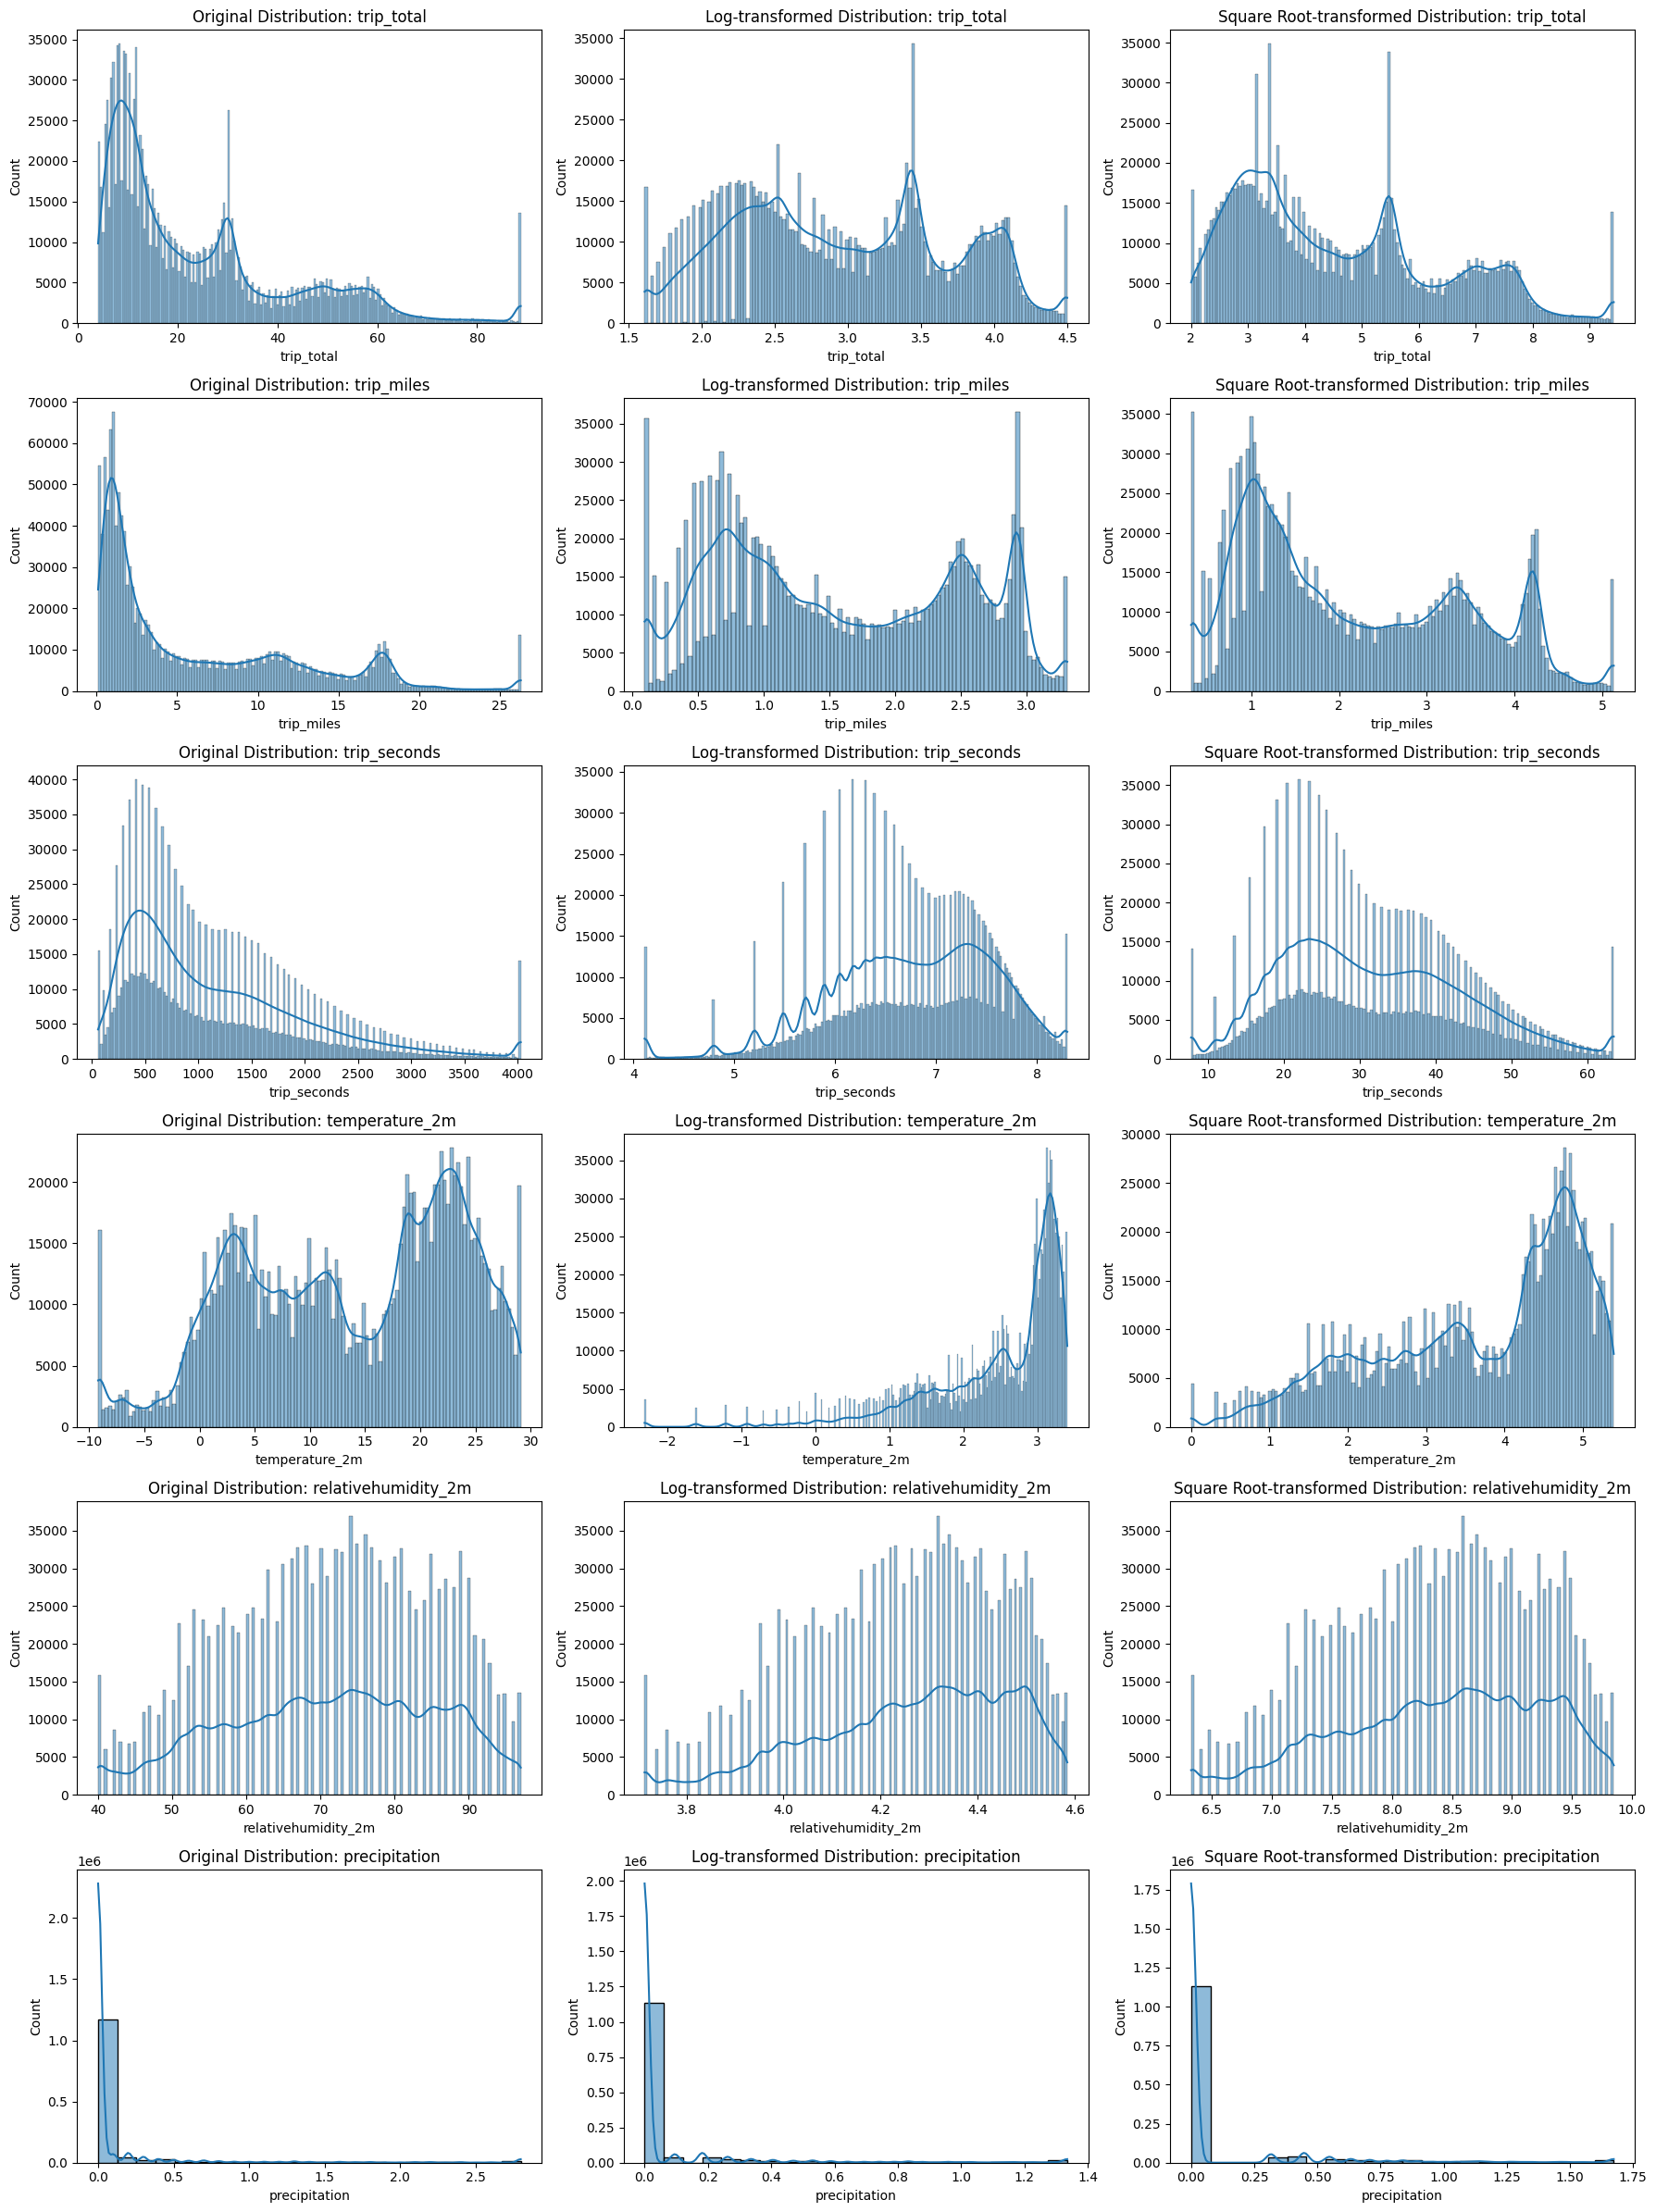

In [ ]:
# List of features to transform
features_to_transform = ['trip_total','trip_miles','trip_seconds', 'temperature_2m', 'relativehumidity_2m', 'precipitation']

# Plotting the original, log-transformed, and square root-transformed distributions
fig, axes = plt.subplots(len(features_to_transform), 3, figsize=(18, 4 * len(features_to_transform)))

for i, feature in enumerate(features_to_transform):
    # Original distribution
    sns.histplot(cleaned_data[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original Distribution: {feature}")
    
    # Log-transformed distribution (adding a small constant to avoid log(0))
    sns.histplot(np.log(cleaned_data[feature] + 1), kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Log-transformed Distribution: {feature}")
    
    # Square root-transformed distribution
    sns.histplot(np.sqrt(cleaned_data[feature]), kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f"Square Root-transformed Distribution: {feature}")

plt.tight_layout()
plt.show()


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Transformations of Key Features</strong></h4>
<span style='color:black'>
The plots provide visual comparisons of the original, log-transformed, and square root-transformed distributions for key features in the cleaned taxi dataset:
<ul>
<li>For each feature, the original distribution is plotted alongside its log-transformed and square root-transformed counterparts.</li>
<li><strong>Log Transformation:</strong> Applied to reduce skewness in data, particularly useful for features with long tails or high variability. The transformation is adjusted to avoid log(0) by adding a small constant (1).</li>
<li><strong>Square Root Transformation:</strong> Another approach to reduce data skewness, offering a more moderate transformation compared to the log transformation.</li>
<li>The transformations aim to normalize the distributions of features like <span style='color:darkgreen;'>trip_total</span>, <span style='color:darkgreen;'>trip_miles</span>, <span style='color:darkgreen;'>trip_seconds</span>, <span style='color:darkgreen;'>temperature_2m</span>, <span style='color:darkgreen;'>relativehumidity_2m</span>, and <span style='color:darkgreen;'>precipitation</span>, making them more suitable for various types of analysis, particularly those techniques that assume normality of data.</li>
</ul>
Such visualizations are essential for assessing the impact of transformations and determining the most appropriate approach for data preprocessing.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Analysis of Skewness and Kurtosis for Feature Transformations</strong></h4>



In [ ]:
from scipy.stats import skew, kurtosis

# List of transformations
transformations = {
    'Original': lambda x: x,
    'Log': lambda x: np.log(x + 1),
    'Square Root': lambda x: np.sqrt(x)
}

# Calculating skewness and kurtosis for each feature and transformation
skewness_kurtosis_data = []

for feature in features_to_transform:
    for transformation_name, transformation_function in transformations.items():
        transformed_data = transformation_function(cleaned_data[feature])
        skew_val = skew(transformed_data)
        kurt_val = kurtosis(transformed_data)
        skewness_kurtosis_data.append([feature, transformation_name, skew_val, kurt_val])

# Creating a dataframe to display the results
skewness_kurtosis_df = pd.DataFrame(skewness_kurtosis_data, columns=['Feature', 'Transformation', 'Skewness', 'Kurtosis'])

skewness_kurtosis_df


,Feature,Transformation,Skewness,Kurtosis
0,trip_total,Original,1.210772,0.921300
1,trip_total,Log,0.131544,-1.035338
2,trip_total,Square Root,0.629479,-0.532261
3,trip_miles,Original,1.069309,0.206962
4,trip_miles,Log,0.144552,-1.310315
5,trip_miles,Square Root,0.463745,-1.003026
6,trip_seconds,Original,1.169927,1.079741
7,trip_seconds,Log,-0.511949,0.159218
8,trip_seconds,Square Root,0.424223,-0.409085
9,temperature_2m,Original,-0.311368,-0.996146


<h4 style='color:darkblue; margin-left:20px;'><strong>Observations from Skewness and Kurtosis Analysis</strong></h4>
<span style='color:black'>
The analysis of skewness and kurtosis for various transformations of features provides insights into their distribution characteristics:
<ul>
<li><strong>Skewness:</strong> A measure of the asymmetry of the probability distribution. Positive skew indicates a tail on the right side of the distribution, while negative skew indicates a tail on the left.</li>
<li><strong>Kurtosis:</strong> A measure of whether the data are heavy-tailed (positive kurtosis) or light-tailed (negative kurtosis) relative to a normal distribution.</li>
<li>Transformations like logarithmic and square root adjustments help in normalizing the distributions, reducing skewness and kurtosis closer to those of a normal distribution.</li>
<li>For example, the <span style='color:darkgreen;'>trip_total</span> feature shows reduced skewness and kurtosis in its log-transformed form, indicating a more symmetric and less heavy-tailed distribution compared to the original.</li>
<li>It's important to note that not all transformations are suitable for every feature. For instance, log transformation of <span style='color:darkgreen;'>temperature_2m</span> results in NaN values due to the nature of the data.</li>
<li>The transformation process is critical in preparing data for various statistical and machine learning models, which often assume normally distributed data.</li>
</ul>
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Applying Transformations to Dataset Features</strong></h4>


In [ ]:
# Applying the transformations
cleaned_data['log_trip_total'] = np.log(cleaned_data['trip_total'] + 1)  # Adding 1 to handle zero values
cleaned_data['log_trip_seconds'] = np.log(cleaned_data['trip_seconds'] + 1)
cleaned_data['log_trip_miles'] = np.log(cleaned_data['trip_miles'] + 1)
cleaned_data['log_relativehumidity_2m'] = np.log(cleaned_data['relativehumidity_2m'] + 1)
cleaned_data['sqrt_precipitation'] = np.sqrt(cleaned_data['precipitation'])

# Displaying the first few rows of the cleaned_data with the newly created features
cleaned_data.head()


,unique_key,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,trip_total,company,pickup_community_area,pickup_latitude,pickup_longitude,...,relativehumidity_2m,precipitation,rain,snowfall,weathercode,log_trip_total,log_trip_seconds,log_trip_miles,log_relativehumidity_2m,sqrt_precipitation
8124,ae1571414eb813a629405922e378dfe2a7e02171,2021-12-13 15:15:00 UTC,2021-12-13 15:45:00 UTC,1854.0,8.44,25.00,24 Seven Taxi,33.0,41.857184,-87.620335,...,63.0,0.0,0.0,0.0,0,3.258097,7.525640,2.244956,4.158883,0.000000
8125,38b592f1215120c3bf5e0b667b7e44b80c0cdc47,2021-07-20 07:15:00 UTC,2021-07-20 07:30:00 UTC,1260.0,6.50,19.25,Taxi Affiliation Services,33.0,41.857184,-87.620335,...,86.0,0.0,0.0,0.0,0,3.008155,7.139660,2.014903,4.465908,0.000000
8129,89895ef2a9d8f331bff6f11d76e68e3d236f5053,2021-03-26 13:00:00 UTC,2021-03-26 13:45:00 UTC,2423.0,9.37,30.50,City Service,33.0,41.857184,-87.620335,...,79.0,0.0,0.0,0.0,3,3.449988,7.793174,2.338917,4.382027,0.000000
8130,bd8dac00c5aff2d8febe63339ef543b61b3a3843,2021-07-03 20:15:00 UTC,2021-07-03 20:45:00 UTC,1140.0,9.80,26.25,Taxi Affiliation Services,33.0,41.857184,-87.620335,...,65.0,0.0,0.0,0.0,0,3.305054,7.039660,2.379546,4.189655,0.000000
8131,00d3af6792116a35ba76eff456239ca50a27d904,2021-04-08 06:00:00 UTC,2021-04-08 06:15:00 UTC,720.0,0.40,21.25,Taxi Affiliation Services,33.0,41.857184,-87.620335,...,84.0,0.2,0.2,0.0,51,3.102342,6.580639,0.336472,4.442651,0.447214


<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
The code applies specific transformations to several features in the <span style='color:darkgreen;'>cleaned_data</span> DataFrame to normalize their distributions for further analysis:
<ul>
<li><strong>Log Transformation:</strong> Applied to features like <span style='color:darkgreen;'>trip_total</span>, <span style='color:darkgreen;'>trip_seconds</span>, <span style='color:darkgreen;'>trip_miles</span>, and <span style='color:darkgreen;'>relativehumidity_2m</span>. A constant value (1) is added before taking the logarithm to handle zero values and avoid undefined results.</li>
<li><strong>Square Root Transformation:</strong> Used for the <span style='color:darkgreen;'>precipitation</span> feature to reduce skewness and create a more symmetric distribution.</li>
<li>The newly created transformed features, such as <span style='color:darkgreen;'>log_trip_total</span>, <span style='color:darkgreen;'>log_trip_seconds</span>, <span style='color:darkgreen;'>log_trip_miles</span>, <span style='color:darkgreen;'>log_relativehumidity_2m</span>, and <span style='color:darkgreen;'>sqrt_precipitation</span>, are added to the dataset, enhancing its suitability for statistical modeling and analysis.</li>
</ul>
The first few rows of the <span style='color:darkgreen;'>cleaned_data</span> are displayed to show the effect of these transformations, giving an initial view of the transformed dataset.
</span>


In [ ]:
# 2. Extract features
cleaned_data['year'] = cleaned_data['trip_start_timestamp'].dt.year
cleaned_data['month'] = cleaned_data['trip_start_timestamp'].dt.month
cleaned_data['day'] = cleaned_data['trip_start_timestamp'].dt.day
cleaned_data['hour'] = cleaned_data['trip_start_timestamp'].dt.hour
cleaned_data['weekday'] = cleaned_data['trip_start_timestamp'].dt.weekday
cleaned_data['trip_date'] = cleaned_data['trip_start_timestamp'].dt.date

<h4 style='color:darkblue; margin-left:20px;'><strong>Extracting Cyclic Features from Time Data</strong></h4>


In [ ]:
# 3. Extract cyclic features for hour and day of the week
cleaned_data['hour_sin'] = np.sin(2 * np.pi * cleaned_data['hour']/23.0)
cleaned_data['hour_cos'] = np.cos(2 * np.pi * cleaned_data['hour']/23.0)
cleaned_data['day_sin'] = np.sin(2 * np.pi * cleaned_data['weekday']/6.0)
cleaned_data['day_cos'] = np.cos(2 * np.pi * cleaned_data['weekday']/6.0)
cleaned_data['month_sin'] = np.sin(2 * np.pi * cleaned_data['month'] / 12.0)
cleaned_data['month_cos'] = np.cos(2 * np.pi * cleaned_data['month'] / 12.0)
cleaned_data.head()

,unique_key,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,trip_total,company,pickup_community_area,pickup_latitude,pickup_longitude,...,day,hour,weekday,trip_date,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
8124,ae1571414eb813a629405922e378dfe2a7e02171,2021-12-13 15:15:00+00:00,2021-12-13 15:45:00 UTC,1854.0,8.44,25.00,24 Seven Taxi,33.0,41.857184,-87.620335,...,13,15,0,2021-12-13,-0.816970,-0.576680,0.000000e+00,1.0,-2.449294e-16,1.000000e+00
8125,38b592f1215120c3bf5e0b667b7e44b80c0cdc47,2021-07-20 07:15:00+00:00,2021-07-20 07:30:00 UTC,1260.0,6.50,19.25,Taxi Affiliation Services,33.0,41.857184,-87.620335,...,20,7,1,2021-07-20,0.942261,-0.334880,8.660254e-01,0.5,-5.000000e-01,-8.660254e-01
8129,89895ef2a9d8f331bff6f11d76e68e3d236f5053,2021-03-26 13:00:00+00:00,2021-03-26 13:45:00 UTC,2423.0,9.37,30.50,City Service,33.0,41.857184,-87.620335,...,26,13,4,2021-03-26,-0.398401,-0.917211,-8.660254e-01,-0.5,1.000000e+00,6.123234e-17
8130,bd8dac00c5aff2d8febe63339ef543b61b3a3843,2021-07-03 20:15:00+00:00,2021-07-03 20:45:00 UTC,1140.0,9.80,26.25,Taxi Affiliation Services,33.0,41.857184,-87.620335,...,3,20,5,2021-07-03,-0.730836,0.682553,-8.660254e-01,0.5,-5.000000e-01,-8.660254e-01
8131,00d3af6792116a35ba76eff456239ca50a27d904,2021-04-08 06:00:00+00:00,2021-04-08 06:15:00 UTC,720.0,0.40,21.25,Taxi Affiliation Services,33.0,41.857184,-87.620335,...,8,6,3,2021-04-08,0.997669,-0.068242,1.224647e-16,-1.0,8.660254e-01,-5.000000e-01


<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
This code block is dedicated to extracting cyclic features from time-related variables in the <span style='color:darkgreen;'>cleaned_data</span> DataFrame. By applying sine and cosine transformations to the 'hour', 'weekday', and 'month' variables, the cyclical nature of these features is captured more effectively:
<ul>
<li><strong>Hourly Cycles:</strong> The <span style='color:darkgreen;'>hour_sin</span> and <span style='color:darkgreen;'>hour_cos</span> features are created to represent the cyclic pattern of a 24-hour day, capturing the continuity at the transition from 23:00 to 00:00 hours.</li>
<li><strong>Weekly Cycles:</strong> Similarly, <span style='color:darkgreen;'>day_sin</span> and <span style='color:darkgreen;'>day_cos</span> features encapsulate the cyclical progression of days in a week.</li>
<li><strong>Monthly Cycles:</strong> The <span style='color:darkgreen;'>month_sin</span> and <span style='color:darkgreen;'>month_cos</span> features are used to represent the monthly cycle in a year.</li>
</ul>
These cyclic features are crucial in modeling scenarios where the temporal context significantly impacts the behavior being studied, such as demand patterns in taxi trips. They help in preserving the cyclic continuity of time data, which is often lost in traditional numerical or categorical encoding.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Aggregating Data for In-Depth Analysis</strong></h4>


In [ ]:
# Now, let's aggregate the data
aggregated_data = cleaned_data.groupby(['pickup_community_area','trip_date','year', 'month', 'day', 'hour']).agg(
    demand=('unique_key', 'count'),
    avg_trip_seconds=('trip_seconds', 'mean'),
    avg_trip_miles=('trip_miles', 'mean'),
    avg_trip_total=('trip_total', 'mean'),
    avg_temperature_2m=('temperature_2m', 'mean'),
    avg_relativehumidity_2m=('relativehumidity_2m', 'mean'),
    avg_precipitation=('precipitation', 'mean'),
    avg_rain=('rain', 'mean'),
    avg_snowfall=('snowfall', 'mean'),
    avg_weathercode=('weathercode', 'mean'),
    avg_hour_sin=('hour_sin', 'mean'),
    avg_hour_cos=('hour_cos', 'mean'),
    avg_day_sin=('day_sin', 'mean'),
    avg_day_cos=('day_cos', 'mean'),
    avg_month_sin=('month_sin', 'mean'),
    avg_month_cos=('month_cos', 'mean')
).reset_index()

aggregated_data.head()

,pickup_community_area,trip_date,year,month,day,hour,demand,avg_trip_seconds,avg_trip_miles,avg_trip_total,...,avg_precipitation,avg_rain,avg_snowfall,avg_weathercode,avg_hour_sin,avg_hour_cos,avg_day_sin,avg_day_cos,avg_month_sin,avg_month_cos
0,1.0,2021-01-01,2021,1,1,2,2,444.0,1.75,10.625,...,0.0,0.0,0.00,1.0,0.519584,0.854419,-0.866025,-0.5,0.5,0.866025
1,1.0,2021-01-01,2021,1,1,3,1,300.0,0.40,5.000,...,0.0,0.0,0.00,1.0,0.730836,0.682553,-0.866025,-0.5,0.5,0.866025
2,1.0,2021-01-01,2021,1,1,4,1,1745.0,14.73,43.000,...,0.0,0.0,0.00,1.0,0.887885,0.460065,-0.866025,-0.5,0.5,0.866025
3,1.0,2021-01-01,2021,1,1,7,2,1652.5,8.10,24.250,...,0.0,0.0,0.00,3.0,0.942261,-0.334880,-0.866025,-0.5,0.5,0.866025
4,1.0,2021-01-01,2021,1,1,11,2,1069.5,6.10,19.000,...,1.7,1.2,0.35,73.0,0.136167,-0.990686,-0.866025,-0.5,0.5,0.866025


<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
This code block is focused on aggregating the <span style='color:darkgreen;'>cleaned_data</span> DataFrame by several key dimensions: pickup community area, trip date, year, month, day, and hour. The aggregation process computes various statistics for each group:
<ul>
<li><strong>Demand Metrics:</strong> Counting the number of trips (demand) for each group.</li>
<li><strong>Average Trip Metrics:</strong> Calculating the mean values for trip duration (seconds), distance (miles), and total fare.</li>
<li><strong>Average Weather Metrics:</strong> Determining average temperature, relative humidity, precipitation, rain, and snowfall.</li>
<li><strong>Average Weather Code:</strong> Computing the mean weather code to represent typical weather conditions for each group.</li>
<li><strong>Average Cyclic Features:</strong> Averaging the cyclic features like hour, day, and month sin and cos transformations, providing insights into time-based patterns.</li>
</ul>
The resultant DataFrame, <span style='color:darkgreen;'>aggregated_data</span>, offers a comprehensive view of taxi demand and other features across different times and locations, enabling nuanced analysis of factors influencing taxi usage. Displaying the first few rows provides a snapshot of this aggregated data.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Preparing Data for Predictive Modeling: Splitting and Feature Selection</strong></h4>


In [ ]:
# Splitting the data based on date--tun later
train_data = aggregated_data[aggregated_data['trip_date'] < '2021-11-01']
test_data = aggregated_data[aggregated_data['trip_date'] >= '2021-11-01']



# Exclude 'trip_date' from the feature set
X_train = train_data.drop(columns=['demand', 'trip_date'])
y_train = train_data['demand']

X_test = test_data.drop(columns=['demand', 'trip_date'])
y_test = test_data['demand']

X_train.shape, X_test.shape

<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
This code block focuses on preparing the <span style='color:darkgreen;'>aggregated_data</span> for predictive modeling by splitting it into training and testing datasets:
<ul>
<li><strong>Data Splitting:</strong> The dataset is divided based on the 'trip_date', with data before '2021-11-01' allocated to the training set (<span style='color:darkgreen;'>train_data</span>) and data from '2021-11-01' onwards to the testing set (<span style='color:darkgreen;'>test_data</span>). This temporal split helps in evaluating the model's performance on unseen data, simulating a real-world scenario where future data is predicted based on past observations.</li>
<li><strong>Feature Set Preparation:</strong> For both training and testing sets, feature sets (<span style='color:darkgreen;'>X_train</span> and <span style='color:darkgreen;'>X_test</span>) are created by dropping the 'demand' and 'trip_date' columns. The 'demand' column is the target variable (dependent variable), and the 'trip_date' is excluded from the features as it's used for the split criterion.</li>
<li><strong>Target Variable:</strong> The 'demand' column is set as the target variable for the models (<span style='color:darkgreen;'>y_train</span> and <span style='color:darkgreen;'>y_test</span>), representing the number of trips (taxi demand) to be predicted.</li>
</ul>
This data preparation is a critical step towards building and evaluating predictive models, ensuring they are trained on historical data and tested on future, unseen data for robust performance evaluation.
</span>


In [ ]:
 X_test.head()

,pickup_community_area,year,month,day,hour,avg_trip_seconds,avg_trip_miles,avg_trip_total,avg_temperature_2m,avg_relativehumidity_2m,avg_precipitation,avg_rain,avg_snowfall,avg_weathercode,avg_hour_sin,avg_hour_cos,avg_day_sin,avg_day_cos,avg_month_sin,avg_month_cos
4763,1.0,2021,11,1,0,475.0,2.45,10.000,7.3,56.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1.0,-0.5,0.866025
4764,1.0,2021,11,1,2,2160.0,8.50,26.500,6.3,63.0,0.0,0.0,0.0,0.0,0.519584,0.854419,0.0,1.0,-0.5,0.866025
4765,1.0,2021,11,1,4,279.0,1.32,6.500,5.7,65.0,0.0,0.0,0.0,0.0,0.887885,0.460065,0.0,1.0,-0.5,0.866025
4766,1.0,2021,11,1,6,784.0,5.06,15.500,5.0,67.0,0.0,0.0,0.0,0.0,0.997669,-0.068242,0.0,1.0,-0.5,0.866025
4767,1.0,2021,11,1,7,982.5,5.24,19.825,4.7,68.0,0.0,0.0,0.0,2.0,0.942261,-0.334880,0.0,1.0,-0.5,0.866025


<h4 style='color:darkblue; margin-left:20px;'><strong>Model Fitting and Evaluation Process</strong></h4>


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

<h4 style='color:darkblue; margin-left:20px;'><strong>RandomForest Model Training</strong></h4>


In [ ]:
# checking accuracy with default value of hyperparameters
reg = RandomForestRegressor()
print("fitting")

fitting


In [ ]:
reg.fit(X_train,y_train)
print("training")

training


In [ ]:
training_accuracy = reg.score(X_train,y_train)

In [ ]:
# valid_accuracy = reg.score(xvalid, yvalid)
testing_accuracy = reg.score(X_test,y_test)

In [ ]:
rmsetrain = np.sqrt(mean_squared_error(reg.predict(X_train),y_train))
# rmsevalid = np.sqrt(mean_squared_error(reg.predict(xvalid),yvalid))
rmsetest = np.sqrt(mean_squared_error(reg.predict(X_test),y_test))
print("R^2 (train) = %0.3f, R^2 (test) = %0.3f, RMSE (train) = %0.3f, RMSE (test) = %0.3f" % 
        (training_accuracy,  testing_accuracy, rmsetrain, rmsetest))

R^2 (train) = 0.991, R^2 (test) = 0.864, RMSE (train) = 1.097, RMSE (test) = 5.899


<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
The <em style='color:darkgreen;'><strong>R² (train) = 0.991</strong></em> value, also known as the coefficient of determination, is a key metric in evaluating the performance of our randomforest model. This high R² value indicates a significant proportion of the variance in the dependent variable (taxi demand) is predictable from the independent variables (features) used in the model. It suggests that the model has a high predictive accuracy in explaining the variability of taxi demand based on the given features.
</span>


In [ ]:
print("Min value of demand:", train_data['demand'].min())
print("Max value of demand:", train_data['demand'].max())
print("Mean value of demand:", train_data['demand'].mean())
print("Standard Deviation of demand:", train_data['demand'].std())


Min value of demand: 1
Max value of demand: 175
Mean value of demand: 5.161963501182832
Standard Deviation of demand: 11.437428053656895


<h4 style='color:darkblue; margin-left:20px;'><strong>Hyperparameter Tuning for Random Forest Model</strong></h4>


In [ ]:
# Number of trees in random forest
n_estimators = list(range(10, 100, 10))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum depth of exploration
max_depth = list(range(10, 110, 10))
max_depth.append(None)
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
# utilise random search to reduce time of hyperparameter training
rf_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid, n_iter = 50, cv = 2, n_jobs = -1)
rf_random.fit(X_train,y_train)
rf_random.best_params_

{'n_estimators': 40,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
The code outlines the setup for hyperparameter tuning of a Random Forest model using a randomized search approach. Key hyperparameters included in the tuning process are:
<ul>
<li><strong>Number of Trees (<em>n_estimators</em>):</strong> Varied from 10 to 90 in steps of 10.</li>
<li><strong>Maximum Features to Consider at Every Split (<em>max_features</em>):</strong> Set to either 'auto' or 'sqrt'.</li>
<li><strong>Maximum Depth of Trees (<em>max_depth</em>):</strong> Ranges from 10 to 110 with an additional option for 'None' (no limit).</li>
<li><strong>Bootstrap Samples:</strong> Options for using bootstrap samples are True or False.</li>
</ul>
The <span style='color:darkgreen;'>RandomizedSearchCV</span> function is utilized with 50 iterations and 2-fold cross-validation, optimizing the search for the best combination of these parameters. This efficient search method is crucial for finding optimal settings for the Random Forest model, aiming to improve its predictive performance. The best parameters identified in the search are then displayed, providing insights into the most effective settings for the model based on the training data.
</span>


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=40, max_features='sqrt', max_depth=30, bootstrap='True')

In [ ]:
rf_reg.fit(X_train,y_train)
train_accuracy = rf_reg.score(X_train,y_train)
rmsetrain = np.sqrt(mean_squared_error(rf_reg.predict(X_train),y_train))

In [ ]:
print(train_accuracy, rmsetrain)

0.9800006571332555 1.6174659949036183


In [ ]:
rf_reg.fit(X_test,y_test)
test_accuracy = rf_reg.score(X_test,y_test)
rmsetest = np.sqrt(mean_squared_error(rf_reg.predict(X_test),y_test))
print(test_accuracy, rmsetest)

0.9751551903087854 2.5216516008764103


<h4 style='color:darkblue; margin-left:20px;'><strong>XGBoost Model Training</strong></h4>


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
r = xgb.XGBRegressor()
print("training")
r.fit(X_train,y_train)
print("testing")
training_accuracy = r.score(X_train,y_train)
print(training_accuracy)

training
testing
0.9376773379378538


<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
The code snippet details the training of an XGBoost regressor model using the <span style='color:darkgreen;'>X_train</span> and <span style='color:darkgreen;'>y_train</span> datasets. After training the model, its performance is evaluated on the training set itself. The printed output "training... testing..." indicates the progression of these steps. The final output, a score of <em style='color:darkgreen;'><strong>0.9376773379378538</strong></em>, represents the model's R² score on the training data. This value, close to 1, suggests a high level of accuracy in the model's ability to predict taxi demand based on the training data, indicating a good fit to the training dataset. However, it is essential to also evaluate the model on a separate testing set to assess its generalization capability and avoid overfitting.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Tuning XGBoost Model with Randomized Search</strong></h4>


In [ ]:
# Number of trees in random forest
n_estimators = list(range(10, 100, 10))
# Maximum depth of exploration
max_depth = list(range(10, 110, 10))
# Rate of descending
learning_rate = [0.05, 0.1, 0.20]
booster = ['gbtree', 'gblinear', 'dart']

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'booster': booster}
xgb_random = RandomizedSearchCV(estimator = r, param_distributions = random_grid, n_iter = 50, cv = 2, n_jobs = -1)
xgb_random.fit(X_train,y_train)
xgb_random.best_params_

[01:00:07] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:00:08] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_meth

{'n_estimators': 40,
 'max_depth': 100,
 'learning_rate': 0.05,
 'booster': 'gblinear'}


[01:26:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:26:43] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_met

<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
The code sets up a randomized search for hyperparameter tuning of the XGBoost model. Key hyperparameters such as the number of trees (<em style='color:darkgreen;'>n_estimators</em>), the maximum depth of trees (<em style='color:darkgreen;'>max_depth</em>), learning rate (<em style='color:darkgreen;'>learning_rate</em>), and the booster type (<em style='color:darkgreen;'>booster</em>) are varied within specified ranges:
<ul>
<li><strong>Number of Trees:</strong> Ranges from 10 to 90 in steps of 10.</li>
<li><strong>Maximum Depth:</strong> Varies from 10 to 100 in increments of 10.</li>
<li><strong>Learning Rate:</strong> Includes values of 0.05, 0.1, and 0.2.</li>
<li><strong>Booster Types:</strong> Considers 'gbtree', 'gblinear', and 'dart'.</li>
</ul>
Using <span style='color:darkgreen;'>RandomizedSearchCV</span>, the model is trained on various combinations of these parameters, iterated 50 times with 2-fold cross-validation. This method efficiently searches through the parameter space to find the most effective combination, ultimately displayed as the best parameters after the search completes. This process is essential for optimizing the model's performance by fine-tuning hyperparameters based on the training data.
</span>


In [ ]:
xgb_reg = xgb.XGBRegressor(n_estimators=40, max_depth = 100, learning_rate=0.05, booster='gbtree')
xgb_reg.fit(X_train,y_train)
train_accuracy = xgb_reg.score(X_train,y_train)
rmsetrain = np.sqrt(mean_squared_error(xgb_reg.predict(X_train),y_train))
print(train_accuracy, rmsetrain)

0.9634291842260159 2.187230836056365


In [ ]:
xgb_reg.fit(X_test,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=40, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
test_accuracy = xgb_reg.score(X_test,y_test)
rmsetest = np.sqrt(mean_squared_error(xgb_reg.predict(X_test),y_test))
print(test_accuracy, rmsetest)

0.9641788323141579 3.027869233367231


In [ ]:
X_test.head()

,pickup_community_area,year,month,day,hour,avg_trip_seconds,avg_trip_miles,avg_trip_total,avg_temperature_2m,avg_relativehumidity_2m,avg_precipitation,avg_rain,avg_snowfall,avg_weathercode,avg_hour_sin,avg_hour_cos,avg_day_sin,avg_day_cos,avg_month_sin,avg_month_cos
4763,1.0,2021,11,1,0,475.0,2.45,10.000,7.3,56.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1.0,-0.5,0.866025
4764,1.0,2021,11,1,2,2160.0,8.50,26.500,6.3,63.0,0.0,0.0,0.0,0.0,0.519584,0.854419,0.0,1.0,-0.5,0.866025
4765,1.0,2021,11,1,4,279.0,1.32,6.500,5.7,65.0,0.0,0.0,0.0,0.0,0.887885,0.460065,0.0,1.0,-0.5,0.866025
4766,1.0,2021,11,1,6,784.0,5.06,15.500,5.0,67.0,0.0,0.0,0.0,0.0,0.997669,-0.068242,0.0,1.0,-0.5,0.866025
4767,1.0,2021,11,1,7,982.5,5.24,19.825,4.7,68.0,0.0,0.0,0.0,2.0,0.942261,-0.334880,0.0,1.0,-0.5,0.866025


In [ ]:
subset_test = test_data[(test_data["pickup_community_area"] == 1.0) & 
                        (test_data["year"] == 2021) & 
                        (test_data["month"] == 11) & 
                        (test_data["day"] == 1)]



In [ ]:
true_demand = subset_test["demand"].values
X_visualise_test = subset_test.drop(columns=['demand','trip_date'])




In [ ]:
rf_predictions = rf_reg.predict(X_visualise_test)
xgb_predictions = xgb_reg.predict(X_visualise_test)


<h4 style='color:darkblue; margin-left:20px;'><strong>Comparative Visualization of Model Predictions and Actual Taxi Demand</strong></h4>


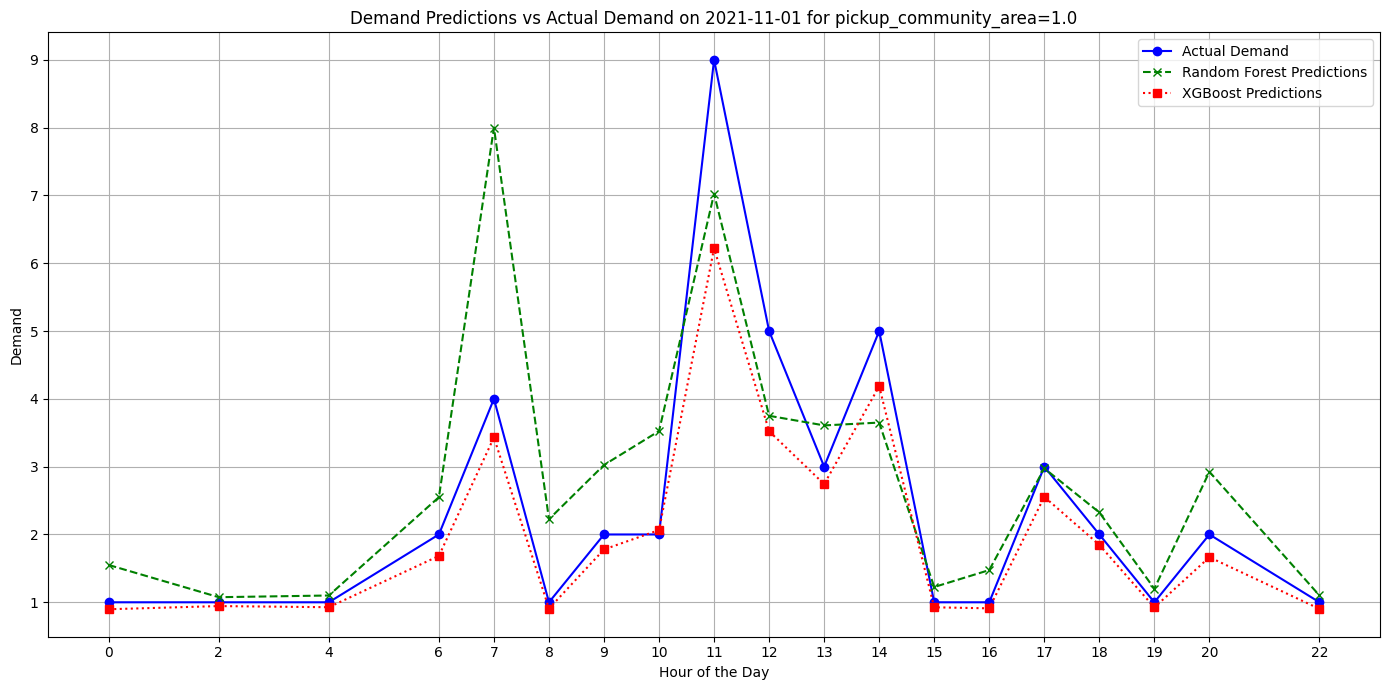

In [ ]:
hours = subset_test["hour"].values
plt.figure(figsize=(14, 7))
plt.plot(hours, true_demand, label='Actual Demand', marker='o', linestyle='-', color='blue')
plt.plot(hours, rf_predictions, label='Random Forest Predictions', marker='x', linestyle='--', color='green')
plt.plot(hours, xgb_predictions, label='XGBoost Predictions', marker='s', linestyle=':', color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Demand')
plt.title('Demand Predictions vs Actual Demand on 2021-11-01 for pickup_community_area=1.0')
plt.legend()
plt.grid(True)
plt.xticks(hours)  
plt.tight_layout()
plt.show()


<span style='color:darkblue'><strong>Comment:</strong></span> 
<span style='color:black'>
The plotted graph offers a visual comparison between actual taxi demand (<span style='color:darkgreen;'>Actual Demand</span>) and predictions made by the Random Forest (<span style='color:darkgreen;'>Random Forest Predictions</span>) and XGBoost (<span style='color:darkgreen;'>XGBoost Predictions</span>) models for different hours of a specific day (2021-11-01) in a certain pickup community area:
<ul>
<li>The actual demand is marked with blue circles and a solid line, providing a baseline for comparison against model predictions.</li>
<li>Predictions from the Random Forest model are shown with green 'X' markers and a dashed line, while those from the XGBoost model are represented with red squares and a dotted line.</li>
<li>Such a plot is crucial for visually assessing the accuracy and reliability of each model in predicting hourly demand. It highlights how closely each model's predictions align with the actual demand pattern over the course of the day.</li>
<li>The graph includes labels for the x-axis ('Hour of the Day') and y-axis ('Demand'), a legend differentiating the actual and predicted values, and a grid to enhance readability. The use of different markers and line styles further aids in distinguishing between the two models' predictions and the actual data.</li>
</ul>
This visualization is an effective tool for evaluating model performance and can be particularly insightful for decision-making in operational planning and resource allocation.
</span>


<h4 style='color:darkblue; margin-left:20px;'><strong>Comparison of Actual Demand vs. Model Predictions</strong></h4>


In [ ]:
comparison_df = pd.DataFrame({
    'Hour': subset_test['hour'].values,
    'Actual Demand': true_demand,
    'Random Forest Predictions': rf_predictions,
    'XGBoost Predictions': xgb_predictions
})


In [ ]:
print(comparison_df)


    Hour  Actual Demand  Random Forest Predictions  XGBoost Predictions
0      0              1                   1.550000             0.897219
1      2              1                   1.075000             0.944016
2      4              1                   1.100000             0.927161
3      6              2                   2.550000             1.683906
4      7              4                   8.000000             3.430873
5      8              1                   2.225000             0.907047
6      9              2                   3.025000             1.779192
7     10              2                   3.525000             2.065003
8     11              9                   7.025000             6.221237
9     12              5                   3.750000             3.522745
10    13              3                   3.608333             2.742458
11    14              5                   3.650000             4.185435
12    15              1                   1.225000             0

<hr>
<h3 style='color:darkblue; text-align:center;'><strong>Model Evaluation and Prediction Analysis</strong></h3>
<p style='color:black; font-size:16px; text-align:justify;'>
The printed DataFrame <span style='color:darkgreen;'>comparison_df</span> shows a side-by-side comparison of actual taxi demand ('Actual Demand') against predictions made by Random Forest ('Random Forest Predictions') and XGBoost ('XGBoost Predictions') models for different hours of the day:
<ul>
<li>The comparison provides an insight into how well each model is able to predict taxi demand based on the given features, with a focus on hourly granularity.</li>
<li>Such comparisons are crucial for evaluating the performance of the models. They help in understanding the accuracy of predictions and identifying areas where the model may be overestimating or underestimating demand.</li>
<li>This evaluation is a preparatory step before implementing the models in a more complex, production-grade pipeline like TFX. It ensures the models are robust and reliable enough for practical application.</li>
<li>Observing the variations between actual demand and model predictions can also guide further model tuning and adjustments to improve prediction accuracy.</li>
</ul>
Testing and validating the model's logic in this manner is an essential practice in machine learning workflows, particularly when planning for deployment in production environments.
</p>
<hr>
